<a href="https://colab.research.google.com/github/naman-32/DBIRD-challenge/blob/master/PKHND_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PKHND Challenge on AIcrowd
#### Author : Naman Goenka

## To open this notebook on Google Computing platform Colab, click below!


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/005cd2a9231779a260fc4bd96159dff6)


## Download Necessary Packages

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 3.5MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


## Download data
The first step is to download out train test data. We will be training a classifier on the train data and make predictions on test data. We submit our predictions


In [0]:
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/test.csv
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/train.zip
!unzip train.zip

--2020-05-18 05:40:21--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/test.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.12, 130.117.252.10, 130.117.252.13, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538694 (526K) [text/csv]
test.csv: Operation not supported

Cannot write to ‘test.csv’ (Success).
--2020-05-18 05:40:24--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/train.zip
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.13, 130.117.252.11, 130.117.252.10, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6224117 (5.9M) [application/zip]
train.zip: Opera

In [2]:
#CREATE A FOLDER pkhnd_challenge in your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive'/pkhnd_challenge

# MANUALLY COPY DATASET TO GRIVE VIA FILE CONTENT 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/pkhnd_challenge



## Import packages

In [3]:
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.ensemble import VotingClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.layers import Dense, Input, Dropout , InputLayer
from keras import Sequential
import pickle
from mlxtend.classifier import EnsembleVoteClassifier

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Load Data
We use pandas library to load our data. Pandas loads them into dataframes which helps us analyze our data easily. Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm)

In [0]:
train_data_path = "train.csv" #path where data is stored

In [0]:
train_data = pd.read_csv(train_data_path) #load data in dataframe using pandas

## Visualize data

In [0]:
print(train_data.shape)
train_data.head()

(1000000, 11)


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


We can see there are 11 column where first 10 column contains the cards information and the last one describing the hand it makes. 1st and 2nd column contains suit and rank of first card respectively, 3rd and 4th column suit and rank of 2nd card and so on.

## Load Test Set
Load the test data now

In [4]:
final_test_path = "test.csv"
final_test = pd.read_csv(final_test_path)

print(final_test.shape)
final_test.head()

(25010, 10)


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


## Visualize percentage of each class

0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: label, dtype: int64


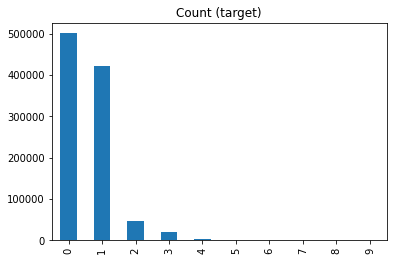

In [0]:
target_count = train_data.label.value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)')
# SKEWED

## Overcoming Skewed 

In [0]:

y_train = train_data.iloc[:,-1] #values

train_data.drop(['label'], axis=1,inplace=True)
print(train_data.shape)
train_data.head()
y_train.head()

(1000000, 10)


0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

(5012090, 10)
(5012090,)
9    501209
8    501209
7    501209
6    501209
5    501209
4    501209
3    501209
2    501209
1    501209
0    501209
Name: label, dtype: int64


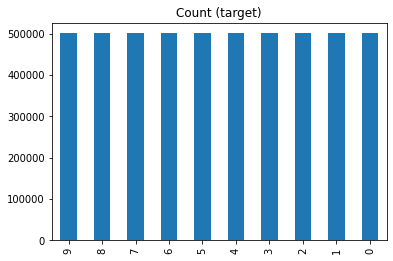

In [0]:
col_names = ['S1',	'C1'	,'S2',	'C2',	'S3'	,'C3'	,'S4',	'C4',	'S5',	'C5']
smote = SMOTE(sampling_strategy='auto' , k_neighbors=2 , n_jobs = -1)#because one class had 2 samples also

# smotetomek = SMOTETomek(sampling_strategy='auto' , smote = smote , n_jobs= -1)
x_sm_train, y_sm_train = smote.fit_sample(train_data, y_train)

print(x_sm_train.shape)
print(y_sm_train.shape)

x_sm_train    = pd.DataFrame(x_sm_train , columns = col_names) 
y_sm_train    = pd.DataFrame(y_sm_train , columns = ['label'])

target_count = y_sm_train.label.value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)')

(4965266, 10)
(4965266, 1)
9    501209
8    501209
7    501209
6    501209
5    501209
4    501209
3    501209
2    501209
1    501209
0    454385
Name: label, dtype: int64


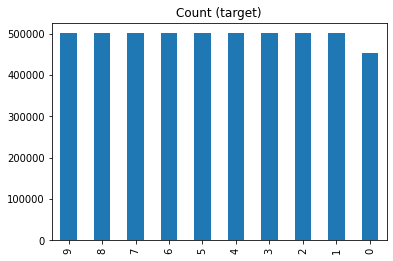

In [0]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority' , n_jobs = -1)
x_sm_train, y_sm_train = tl.fit_sample(x_sm_train, y_sm_train)

print(x_sm_train.shape)
print(y_sm_train.shape)

x_sm_train    = pd.DataFrame(x_sm_train , columns = col_names) 
y_sm_train    = pd.DataFrame(y_sm_train , columns = ['label'])


target_count = y_sm_train.label.value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)')


x_sm_train.to_csv('x_sm_train.csv',header=col_names,index=False)
y_sm_train.to_csv('y_sm_train.csv',header=['label'],index=False)

## Normalisation

In [5]:
#train_data final_test


# y_train = train_data.iloc[:,-1] #values
# train_data.head()
# train_data.drop(['label'], axis=1,inplace=True)

train_data = pd.read_csv('x_sm_train.csv')
y_train    = pd.read_csv('y_sm_train.csv').label
num_train = len(train_data)

df_all = pd.concat([train_data, final_test])

# Scaling features
scaler = RobustScaler()
df_all = scaler.fit_transform(df_all)

col_names = ['S1',	'C1'	,'S2',	'C2',	'S3'	,'C3'	,'S4',	'C4',	'S5',	'C5']
x_train    = pd.DataFrame(df_all[:num_train] , columns = col_names) 
final_test = pd.DataFrame(df_all[num_train:] , columns = col_names) 

print(x_train.shape)
print(y_train.shape)
print(final_test.shape)

x_train.head()


(4965266, 10)
(4965266,)
(25010, 10)


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,-0.5,-1.000000,-0.5,1.000000,0.0,-0.571429,0.0,-0.666667,-0.5,0.666667
1,0.5,0.833333,0.5,-0.833333,0.5,0.428571,1.0,-0.333333,0.0,-0.500000
2,-0.5,0.333333,1.0,-0.166667,-0.5,-0.571429,0.5,-0.833333,0.5,0.166667
3,-0.5,-0.500000,0.5,1.000000,0.0,0.714286,0.0,-1.000000,0.5,-0.333333
4,0.5,0.500000,0.0,0.000000,-0.5,-0.857143,0.0,0.666667,1.0,0.166667


9    501209
8    501209
7    501209
6    501209
5    501209
4    501209
3    501209
2    501209
1    501209
0    454385
Name: label, dtype: int64


0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

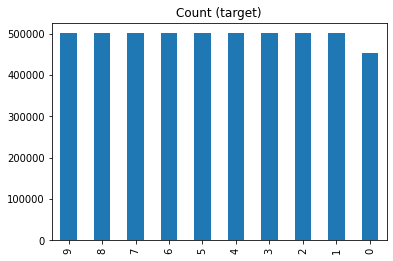

In [6]:
target_count = y_train.value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)')
y_train.head()

Class weights as dataset is skewed now also, maybe used later

In [0]:
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

## Split Data into Train and Validation
Now we want to see how well our classifier is performing, but we dont have the test data labels with us to check. What do we do ? So we split our dataset into train and validation. The idea is that we test our classifier on validation set in order to get an idea of how well our classifier works. This way we can also ensure that we dont [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) on the train dataset. There are many ways to do validation like [k-fold](https://machinelearningmastery.com/k-fold-cross-validation/),[leave one out](https://en.wikipedia.org/wiki/Cross-validation_(statistics), etc

In [8]:
X_train, X_val , y_train , y_val  = train_test_split(train_data, y_train , test_size=0.2, random_state=42 , stratify = y_train) 
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(3972212, 10)
(3972212,)
(993054, 10)
(993054,)


Here we have selected the size of the testing data to be 20% of the total data. You can change it and see what effect it has on the accuracies. To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Now, since we have our data splitted into train and validation sets, we need to get the label separated from the data.(already done)

8    400968
9    400967
7    400967
6    400967
5    400967
4    400967
3    400967
2    400967
1    400967
0    363508
Name: label, dtype: int64


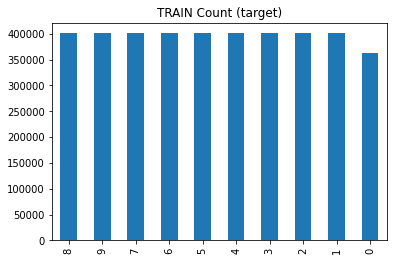

In [9]:
# X_train,y_train = X_train.iloc[:,:-1],X_train.iloc[:,-1]
# X_val,y_val = X_val.iloc[:,:-1],X_val.iloc[:,-1]
target_count = y_train.value_counts()
print(target_count)
target_count.plot(kind='bar', title='TRAIN Count (target)')


9    100242
7    100242
6    100242
5    100242
4    100242
3    100242
2    100242
1    100242
8    100241
0     90877
Name: label, dtype: int64


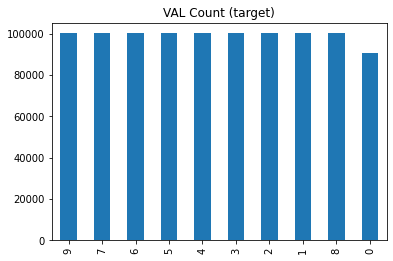

In [10]:
target_count = y_val.value_counts()
print(target_count)
target_count.plot(kind='bar', title='VAL Count (target)')

## Feature Selection

In [0]:

# lsvc = LinearSVC(C=0.05, penalty="l1", dual=False, max_iter = 1000).fit(x_train, y_train)
# model = SelectFromModel(lsvc, prefit=True)
# x_train_new = model.transform(x_train)
# final_test_new = model.transform(final_test)


# feature_idx  = model.get_support()
# feature_name = x_train.columns[feature_idx]

# x_train_new.shape
# final_test_new.shape

In [0]:
# x_train_new    = pd.DataFrame(x_train_new   , columns = feature_name) 
# final_test_new = pd.DataFrame(final_test_new, columns = feature_name)
# x_train_new.head()

## Define the Classifier
Now we come to the juicy part. We have fixed our data and now we train a classifier. The classifier will learn the function by looking at the inputs and corresponding outputs. There are a ton of classifiers to choose from some being [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc), [SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Random Forests](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47), [Decision Trees](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052), etc.   
Tip: A good model doesnt depend solely on the classifier but on the features(columns) you choose. So make sure to play with your data and keep only whats important. 

## SVM

In [0]:
X_train, X_dev , y_train , y_dev  = train_test_split(X_train, y_train , test_size=0.2, random_state=42 , stratify = y_train) 

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVM analysis
[[8.84932381e-01 1.35457817e-02 9.10021237e-03 5.82105483e-02
  1.01235736e-03 3.57626242e-03 2.88081693e-02 7.48264137e-04
  0.00000000e+00 6.60233062e-05]
 [8.44226971e-01 1.20308853e-02 1.00456894e-02 5.76604617e-02
  7.43201452e-03 2.27449572e-03 6.10223260e-02 5.20739810e-03
  3.99034337e-05 5.98551505e-05]
 [7.74206420e-01 1.54526047e-02 8.04054189e-03 4.49113146e-02
  2.21364298e-02 1.61608906e-03 1.15610223e-01 1.78468107e-02
  1.49637876e-04 2.99275753e-05]
 [7.46234113e-01 5.79597374e-03 8.74882784e-03 6.22393807e-02
  2.51990184e-02 4.78841204e-04 1.29626304e-01 2.16675645e-02
  9.97585842e-06 0.00000000e+00]
 [4.36543565e-01 5.98551505e-05 3.71101933e-03 5.95858024e-02
  9.15384769e-02 3.49155045e-04 3.45803156e-01 6.16408292e-02
  7.68141099e-04 0.00000000e+00]
 [8.91672153e-01 5.83587718e-03 2.61367491e-03 1.75475350e-02
  1.34674089e-03 7.57865964e-02 4.62879831e-03 1.69589593e-04
  0.00000000e+00 3.99034337e-04]
 [6.44759682e-01 1.01354722e-02 3.95043994e-0

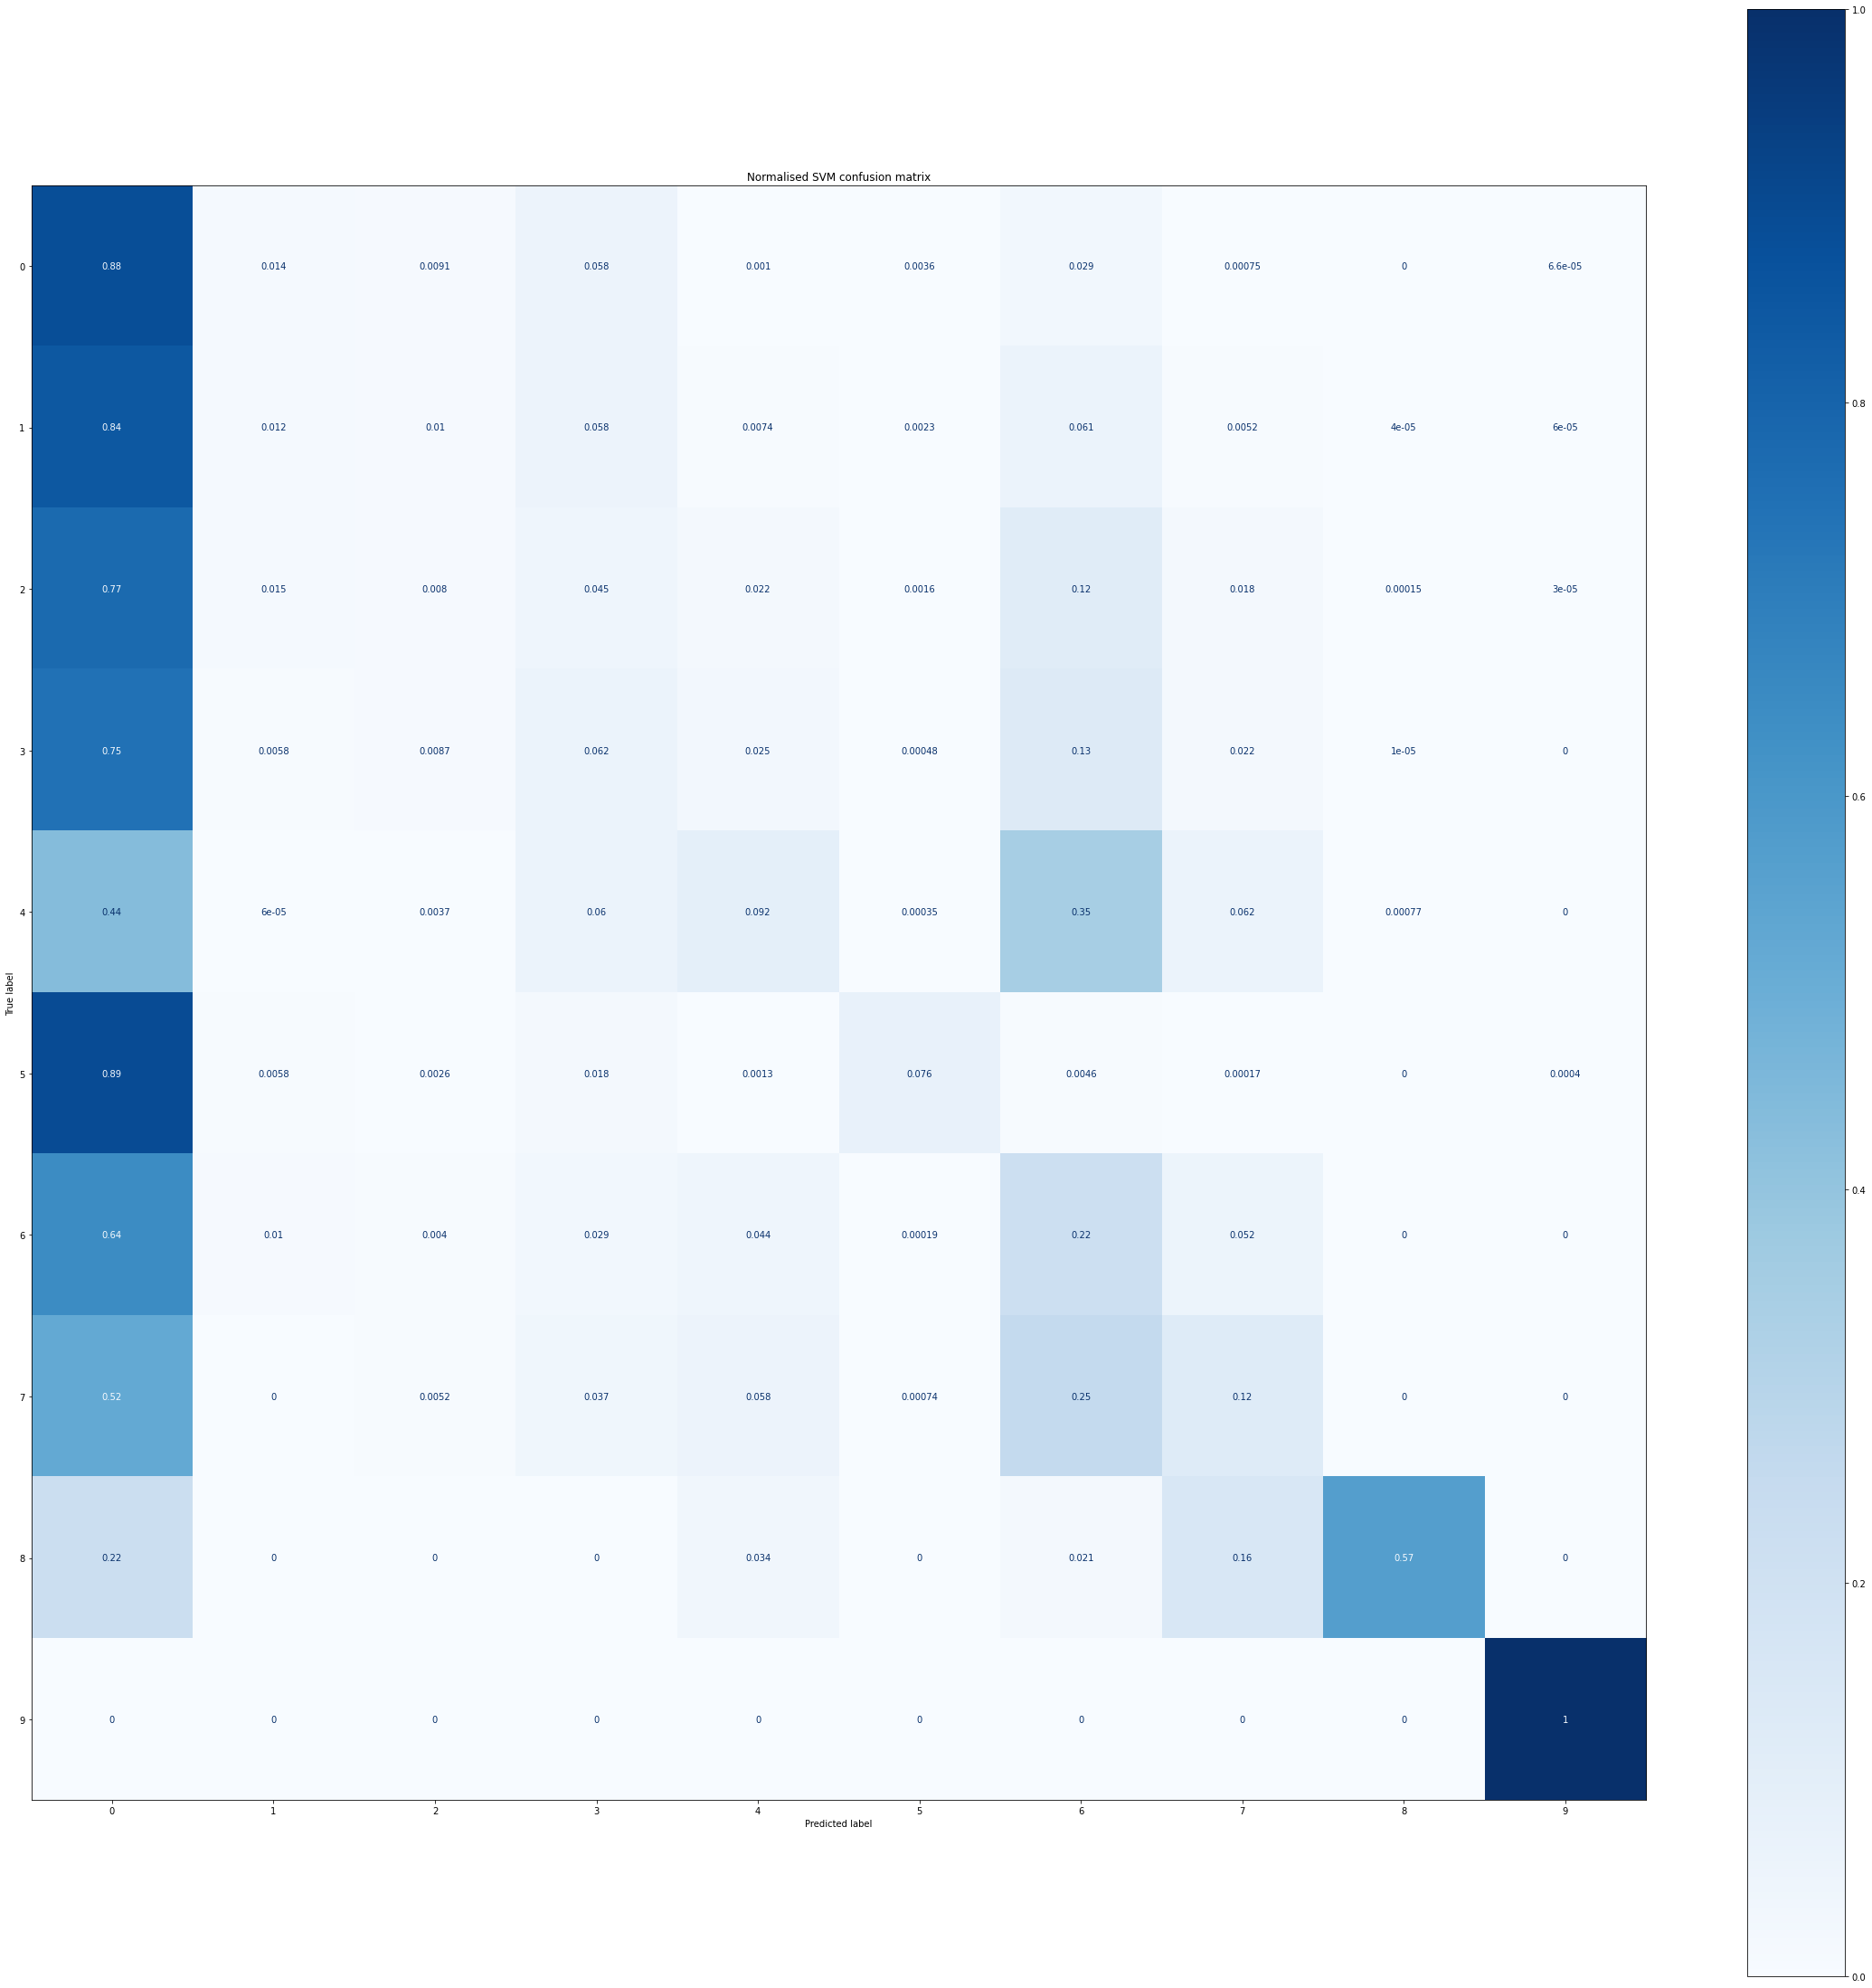

##############################################################################################
Training set score for SVM: 0.298526
Validation  set score for SVM: 0.298680


FileNotFoundError: ignored

In [0]:

X_train = pd.concat([X_train, X_dev])
y_train = pd.concat([y_train, y_dev])
# THESE ARE RESULTS OF GRID SEARCH DONE BY ME
clf1 = SVC(
                 gamma='scale',
                 max_iter=1000,
                 class_weight = 'balanced',
                 kernel='rbf',
                 C=10,
                 verbose=10,
          
          )
clf1.fit(X_train , y_train)
y_pred = clf1.predict(X_val)

# Making the Confusion Matrix


# print(confusion_matrix(y_val,y_pred))

fig, ax = plt.subplots(figsize=(40, 40))   
disp = plot_confusion_matrix(clf1,
                             X_val, 
                             y_val,
                                ax = ax,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalised SVM confusion matrix')

print('SVM analysis')
print(disp.confusion_matrix)
plt.show()

print('##############################################################################################')
print("Training set score for SVM: %f" % clf1.score(X_train, y_train))
print("Validation  set score for SVM: %f" % np.mean(y_pred == y_val ))


In [0]:
SVM_classifier_f = open("SVM_classifier.pickle","wb")
pickle.dump(clf1 , SVM_classifier_f) 
SVM_classifier_f.close()


We have used [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification) as a classifier here and set few of the parameteres. But one can set more parameters and increase the performance. To see the list of parameters visit [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

We can also use other classifiers. To read more about sklean classifiers visit [here](https://scikit-learn.org/stable/supervised_learning.html). Try and use other classifiers to see how the performance of your model changes. Try using [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) or [MLP](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and compare how the performance changes.


## Logistic Regression



In [0]:
params_grid = {     
                    'solver':['newton-cg', 'lbfgs', 'sag', 'saga'], 
                     'C' : [1,10],         
                     
              }

lr_model = GridSearchCV(LogisticRegression( class_weight ='balanced' , max_iter = 850 , random_state = 42), params_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=10) 
lr_model.fit(X_train, y_train)

# View the accuracy score
print('Best score for training data:', lr_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',lr_model.best_estimator_.C,"\n") 
print('Best solver:',lr_model.best_estimator_.solver,"\n")


final_lr_model = lr_model.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 29.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 149.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 165.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 202.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 308.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 356.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 359.7min finished


Best score for training data: 0.1925295666787184 

Best C: 10 

Best solver: saga 



              precision    recall  f1-score   support

           0       0.17      0.33      0.22     90877
           1       0.16      0.01      0.01    100242
           2       0.16      0.02      0.04    100242
           3       0.21      0.01      0.02    100242
           4       0.15      0.12      0.13    100242
           5       0.03      0.02      0.03    100242
           6       0.15      0.03      0.05    100242
           7       0.20      0.42      0.27    100242
           8       0.27      0.62      0.37    100241
           9       0.62      1.00      0.77    100242

    accuracy                           0.26    993054
   macro avg       0.21      0.26      0.19    993054
weighted avg       0.21      0.26      0.19    993054



Log REg analysis
[[3.26386214e-01 8.68206477e-03 2.08523609e-02 6.38225294e-03
  7.71592372e-02 8.54671699e-02 2.69925284e-02 1.77591690e-01
  1.77382616e-01 9.31038657e-02]
 [2.90925959e-01 7.66145927e-03 2.08994234e-02 6.99307675e-03
  8

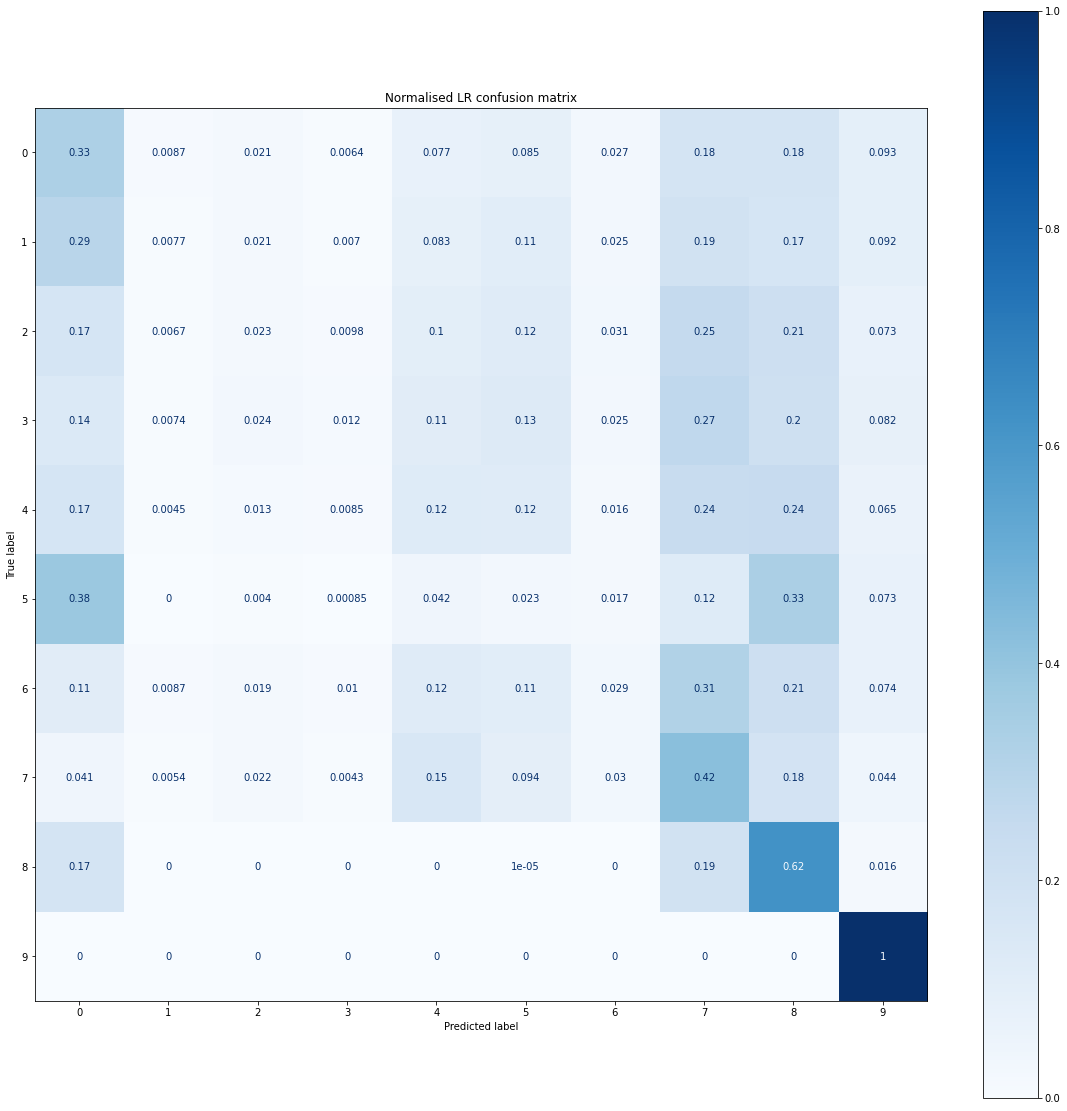

##############################################################################################
Training set score for LR: 0.258895
Validation set score for LR: 0.258506


In [0]:
# clf3 = LogisticRegression(class_weight = 'balanced' , max_iter= 700 , n_jobs=-1 ,solver=lr_model.best_estimator_.solver,C=lr_model.best_estimator_.C)
clf2 = LogisticRegression( class_weight ='balanced' , max_iter = 810 , random_state = 42, C=10 , solver = 'saga') # was overfitting previously
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_val)

print(classification_report(y_val,y_pred))
print("\n")
fig, ax = plt.subplots(figsize=(20, 20))    
disp = plot_confusion_matrix(clf2, X_val, y_val,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 ax = ax,
                             )
disp.ax_.set_title('Normalised LR confusion matrix')

print('Log REg analysis')
print(disp.confusion_matrix)
plt.show()

print('##############################################################################################')
print("Training set score for LR: %f" % clf2.score(X_train, y_train))
print("Validation set score for LR: %f" % np.mean(y_pred == y_val ))

LR_classifier_f = open("LR_classifier.pickle","wb")
pickle.dump(clf2 , LR_classifier_f) 
LR_classifier_f.close()


## Decision Tree

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 23.4min finished


Best score for training data: 0.871898073460312 

Best min leaf : 15 

Best min_impurity_decrease : 0 

Best criterion : entropy 

              precision    recall  f1-score   support

           0       0.68      0.66      0.67     90877
           1       0.60      0.44      0.51    100242
           2       0.78      0.85      0.81    100242
           3       0.85      0.94      0.89    100242
           4       0.96      1.00      0.98    100242
           5       0.95      1.00      0.97    100242
           6       0.98      1.00      0.99    100242
           7       1.00      1.00      1.00    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.89    993054
   macro avg       0.88      0.89      0.88    993054
weighted avg       0.88      0.89      0.88    993054



Decision Tree Analysis
[[3.26386214e-01 8.68206477e-03 2.08523609e-02 6.38225294e-03
  7.71592372e-02 8.5467

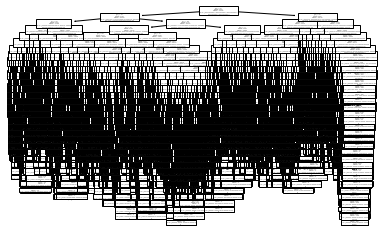

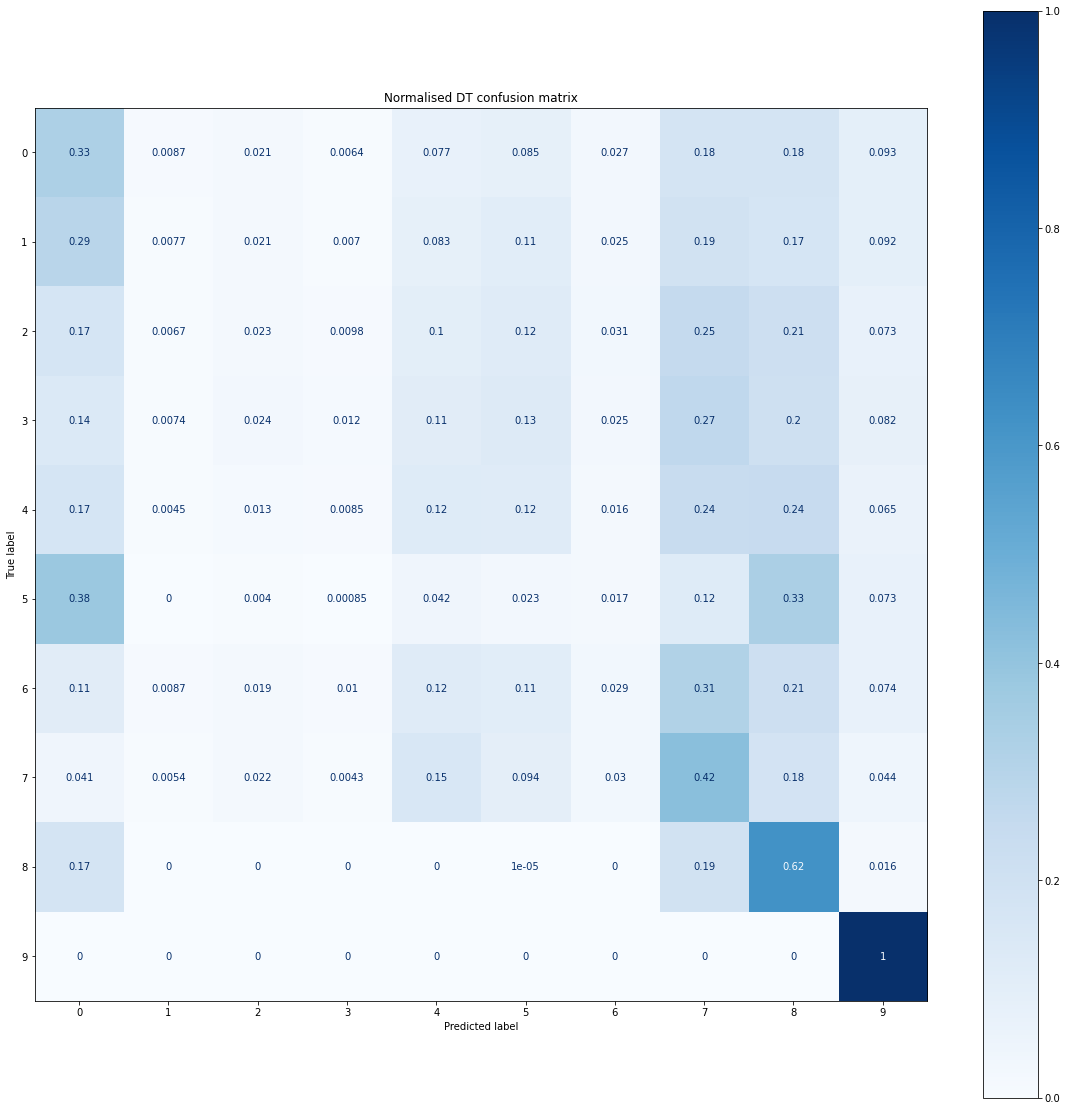

##############################################################################################
Training set score for DT: 0.909495
Validation  set score for DT: 0.889743


In [0]:
params_grid = {     
                     'min_samples_leaf':        [15,  20 , 35 , 0], 
                     'min_impurity_decrease' : [0 , 0.0015 , 0.005],
                        'criterion':['entropy' , 'gini'],      
                     
}

dt_model = GridSearchCV(DecisionTreeClassifier( class_weight ='balanced' ,  random_state = 42), params_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=10) 
dt_model.fit(X_train, y_train)

# View the accuracy score
print('Best score for training data:', dt_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best min leaf :',dt_model.best_estimator_.min_samples_leaf,"\n") 
print('Best min_impurity_decrease :',dt_model.best_estimator_.min_impurity_decrease,"\n")
print('Best criterion :',dt_model.best_estimator_.criterion,"\n")


clf3 = dt_model.best_estimator_





# clf2 = DecisionTreeClassifier(min_samples_leaf = 20 , random_state = 42 , class_weight = 'balanced'  , min_impurity_decrease=0.0015,)

# clf3.fit(X_train , y_train)
y_pred = clf3.predict(X_val)

from sklearn import tree
tree.plot_tree(clf3) 

print(classification_report(y_val,y_pred))
print("\n")
fig, ax = plt.subplots(figsize=(20,20))         
disp = plot_confusion_matrix(clf2, X_val, y_val,
                                 
                                 cmap=plt.cm.Blues,
                                 ax = ax,
                                 normalize='true')
disp.ax_.set_title('Normalised DT confusion matrix')

print('Decision Tree Analysis')
print(disp.confusion_matrix)
plt.show()

print('##############################################################################################')
print("Training set score for DT: %f" % clf3.score(X_train, y_train))
print("Validation  set score for DT: %f" % np.mean(y_pred == y_val ))

DT_classifier_f = open("DT_classifier.pickle","wb")
pickle.dump(clf3 , DT_classifier_f) 
DT_classifier_f.close()


## MLP

Iteration 1, loss = 1.18789167
Validation score: 0.597532
Iteration 2, loss = 0.95686285
Validation score: 0.627153
Iteration 3, loss = 0.89310000
Validation score: 0.646198
Iteration 4, loss = 0.87300035
Validation score: 0.639597
Iteration 5, loss = 0.86004812
Validation score: 0.660756
Iteration 6, loss = 0.84802453
Validation score: 0.659301
Iteration 7, loss = 0.83160386
Validation score: 0.664508
Iteration 8, loss = 0.82117723
Validation score: 0.678764
Iteration 9, loss = 0.81866428
Validation score: 0.662869
Iteration 10, loss = 0.81675198
Validation score: 0.677369
Iteration 11, loss = 0.81534250
Validation score: 0.676536
Iteration 12, loss = 0.81419541
Validation score: 0.680428
Iteration 13, loss = 0.81355817
Validation score: 0.685622
Iteration 14, loss = 0.81233419
Validation score: 0.680541
Iteration 15, loss = 0.81121564
Validation score: 0.682137
Iteration 16, loss = 0.81083585
Validation score: 0.677294
Iteration 17, loss = 0.80978218
Validation score: 0.686143
Iterat

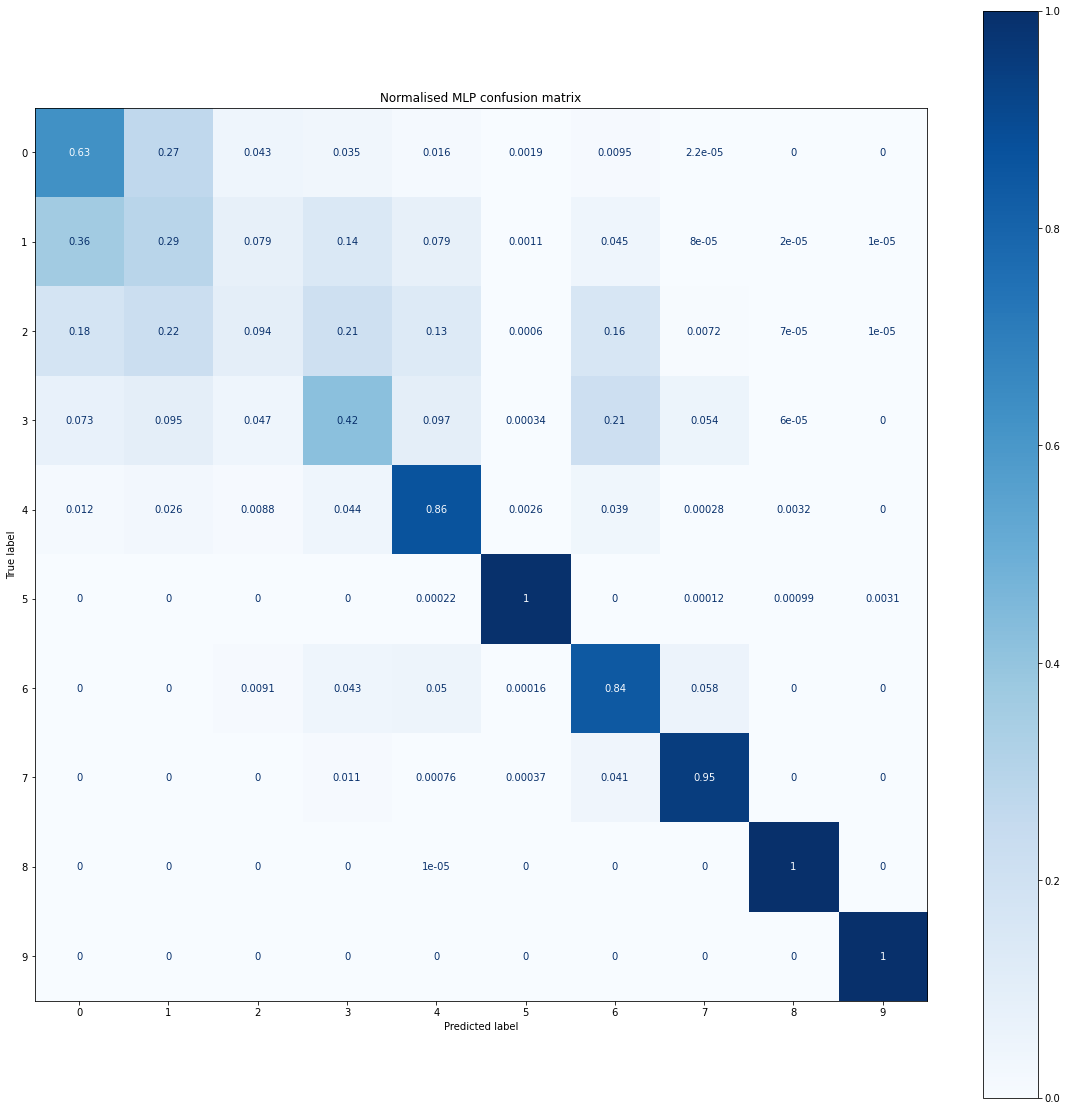

##############################################################################################
Training set score for MLP: 0.708442
Validation set score for MLP: 0.708463


In [0]:


clf4 = MLPClassifier(hidden_layer_sizes=(20,10,5, ), activation='relu', solver='adam', alpha=0.0001, batch_size=64,
                                           learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=400, shuffle=True, random_state=42, tol=0.0001, verbose=10, 
                                           warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                                           beta_2=0.999, epsilon=1e-08, n_iter_no_change=12, max_fun=15000)

clf4.fit(X_train , y_train)
y_pred = clf4.predict(X_val)

print(classification_report(y_val,y_pred))
print("\n")
fig, ax = plt.subplots(figsize=(20, 20))    
disp = plot_confusion_matrix(clf4, X_val, y_val,
                                 ax = ax,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalised MLP confusion matrix')

print('MLP analysis')
print(disp.confusion_matrix)
plt.show()
print('##############################################################################################')
print("Training set score for MLP: %f" % clf4.score(X_train, y_train))
print("Validation set score for MLP: %f" % np.mean(y_pred == y_val ))

MLP_classifier_f = open("MLP_classifier.pickle","wb")
pickle.dump(clf4 , MLP_classifier_f) 
MLP_classifier_f.close()


## Ensemble Classifier 

### Loading pickled classifiers for ensemble learning

In [0]:
SVM_classifier_f = open("SVM_classifier.pickle","rb")
clf1 = pickle.load( SVM_classifier_f) 
SVM_classifier_f.close()

LR_classifier_f = open("LR_classifier.pickle","rb")
clf2 = pickle.load( LR_classifier_f) 
LR_classifier_f.close()

DT_classifier_f = open("DT_classifier.pickle","rb")
clf3 = pickle.load( DT_classifier_f) 
DT_classifier_f.close()

MLP_classifier_f = open("MLP_classifier.pickle","rb")
clf4 = pickle.load( MLP_classifier_f) 
MLP_classifier_f.close()

## Grid Search of weights of ENSEMBLE classifier

***Run below one cell only*** I ran it four times because training stopped in betweeen (it's pretty time consuming even on collab TPU so this step can be skipped also)

              precision    recall  f1-score   support

           0       0.25      0.93      0.39     90877
           1       0.52      0.12      0.19    100242
           2       0.77      0.13      0.23    100242
           3       0.83      0.43      0.56    100242
           4       0.90      0.85      0.88    100242
           5       1.00      0.66      0.80    100242
           6       0.86      0.84      0.85    100242
           7       0.83      0.95      0.89    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.68    993054
   macro avg       0.80      0.68      0.67    993054
weighted avg       0.80      0.68      0.67    993054



Analysis
[[9.28694829e-01 5.55696161e-02 5.95310144e-03 4.21448771e-03
  2.58591283e-03 1.24343893e-03 1.38648943e-03 2.64093225e-04
  3.30116531e-05 5.50194219e-05]
 [7.91993376e-01 1.19181581e-01 2.03407753e-02 3.39578221e-02
  2.3243750

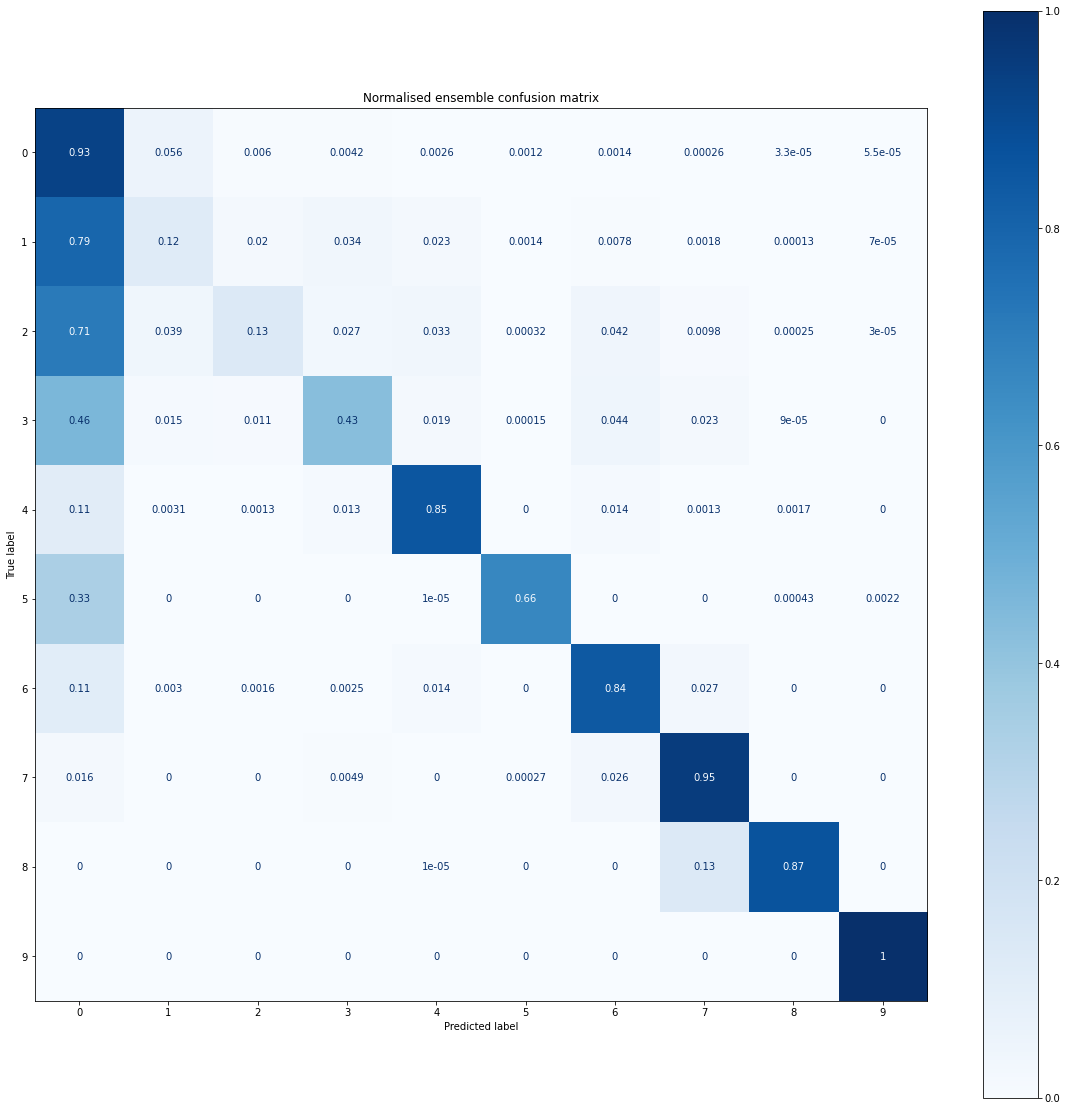

              precision    recall  f1-score   support

           0       0.45      0.84      0.58     90877
           1       0.34      0.21      0.26    100242
           2       0.45      0.10      0.16    100242
           3       0.53      0.44      0.48    100242
           4       0.73      0.87      0.79    100242
           5       1.00      1.00      1.00    100242
           6       0.67      0.86      0.75    100242
           7       0.91      0.95      0.93    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.73    993054
   macro avg       0.71      0.73      0.70    993054
weighted avg       0.71      0.73      0.70    993054



Analysis
[[8.42897543e-01 1.08762393e-01 1.91357549e-02 1.46681779e-02
  9.62839882e-03 6.27221409e-04 4.25850325e-03 2.20077687e-05
  0.00000000e+00 0.00000000e+00]
 [5.42008340e-01 2.06600028e-01 5.10863710e-02 1.00895832e-01
  6.6888130

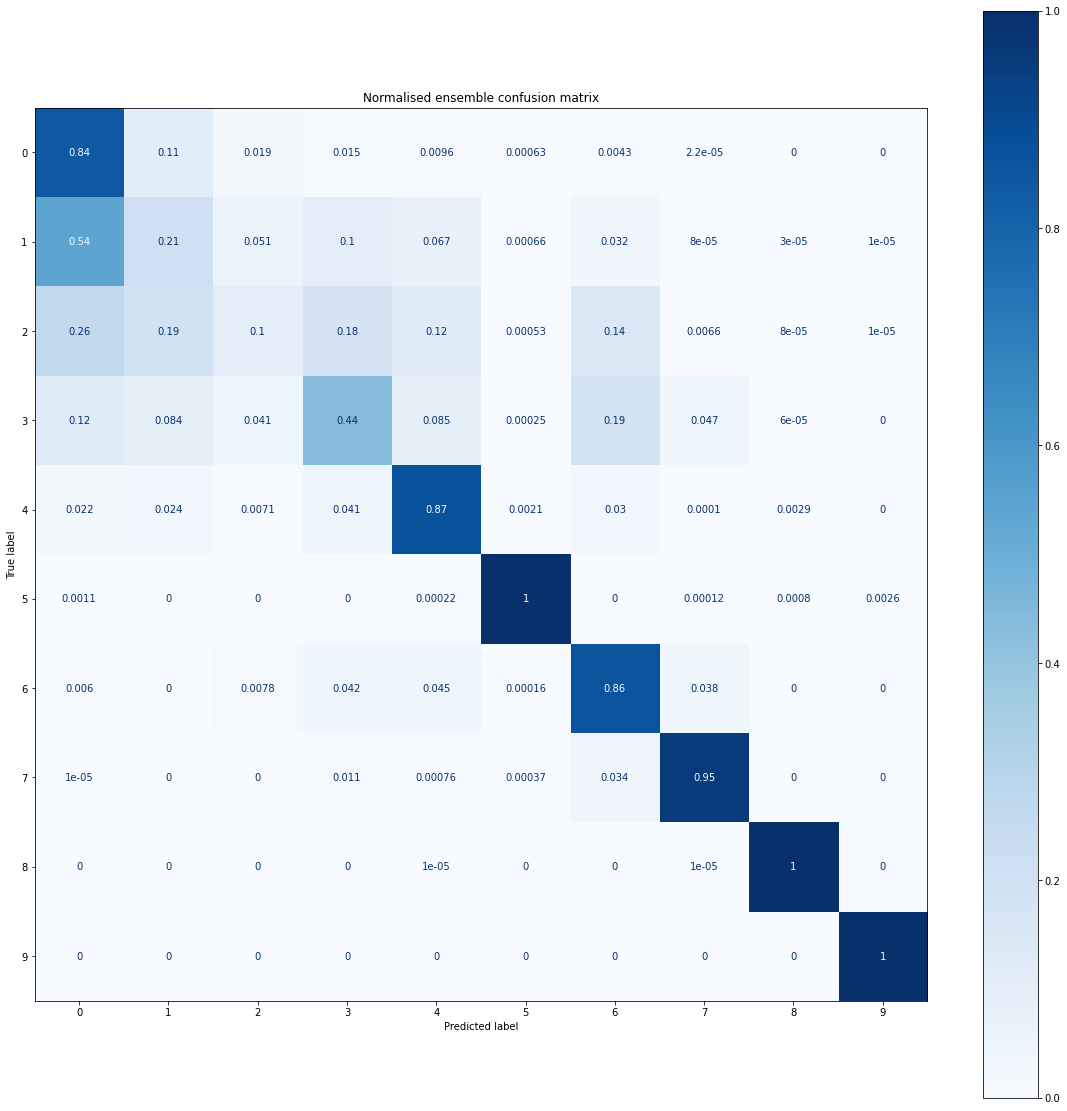

              precision    recall  f1-score   support

           0       0.48      0.68      0.57     90877
           1       0.33      0.27      0.30    100242
           2       0.35      0.09      0.15    100242
           3       0.47      0.42      0.44    100242
           4       0.70      0.86      0.77    100242
           5       0.99      1.00      0.99    100242
           6       0.62      0.84      0.72    100242
           7       0.89      0.95      0.92    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.71    993054
   macro avg       0.68      0.71      0.69    993054
weighted avg       0.69      0.71      0.69    993054



Analysis
[[6.84936783e-01 2.21849313e-01 3.72371447e-02 3.11630005e-02
  1.45141235e-02 1.41950108e-03 8.85812692e-03 2.20077687e-05
  0.00000000e+00 0.00000000e+00]
 [3.97009238e-01 2.68450350e-01 7.39011592e-02 1.36978512e-01
  7.8370343

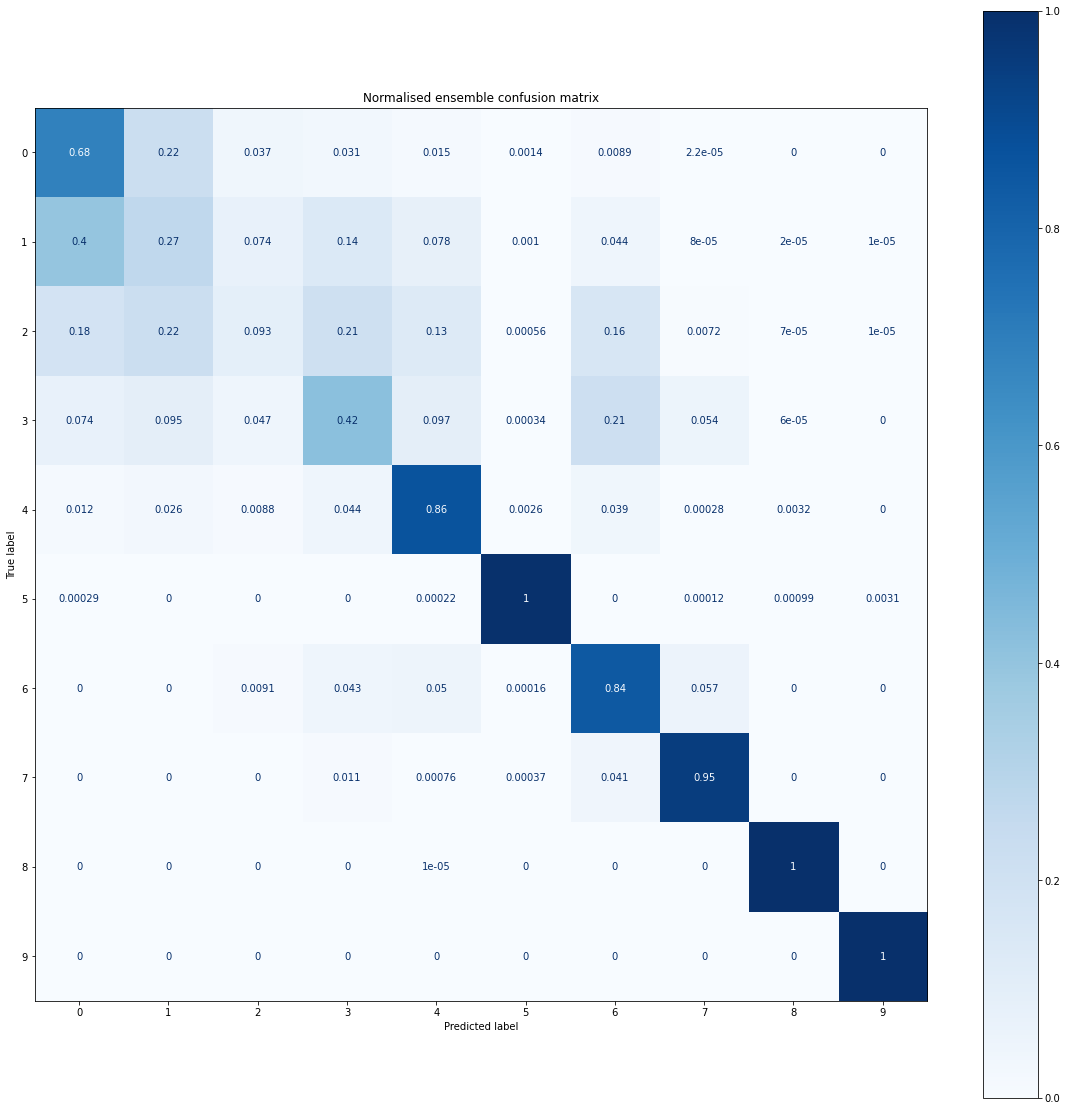

              precision    recall  f1-score   support

           0       0.45      0.84      0.59     90877
           1       0.61      0.26      0.37    100242
           2       0.82      0.64      0.72    100242
           3       0.87      0.83      0.85    100242
           4       0.96      0.97      0.97    100242
           5       0.98      1.00      0.99    100242
           6       0.97      0.98      0.97    100242
           7       0.99      0.99      0.99    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.85    993054
   macro avg       0.86      0.85      0.84    993054
weighted avg       0.87      0.85      0.85    993054



Analysis
[[8.44779207e-01 9.84627574e-02 2.69595167e-02 1.43160536e-02
  3.40020027e-03 1.10809116e-02 7.92279675e-04 9.90349593e-05
  7.70271906e-05 3.30116531e-05]
 [5.36022825e-01 2.61417370e-01 9.41322001e-02 7.45695417e-02
  1.9482851

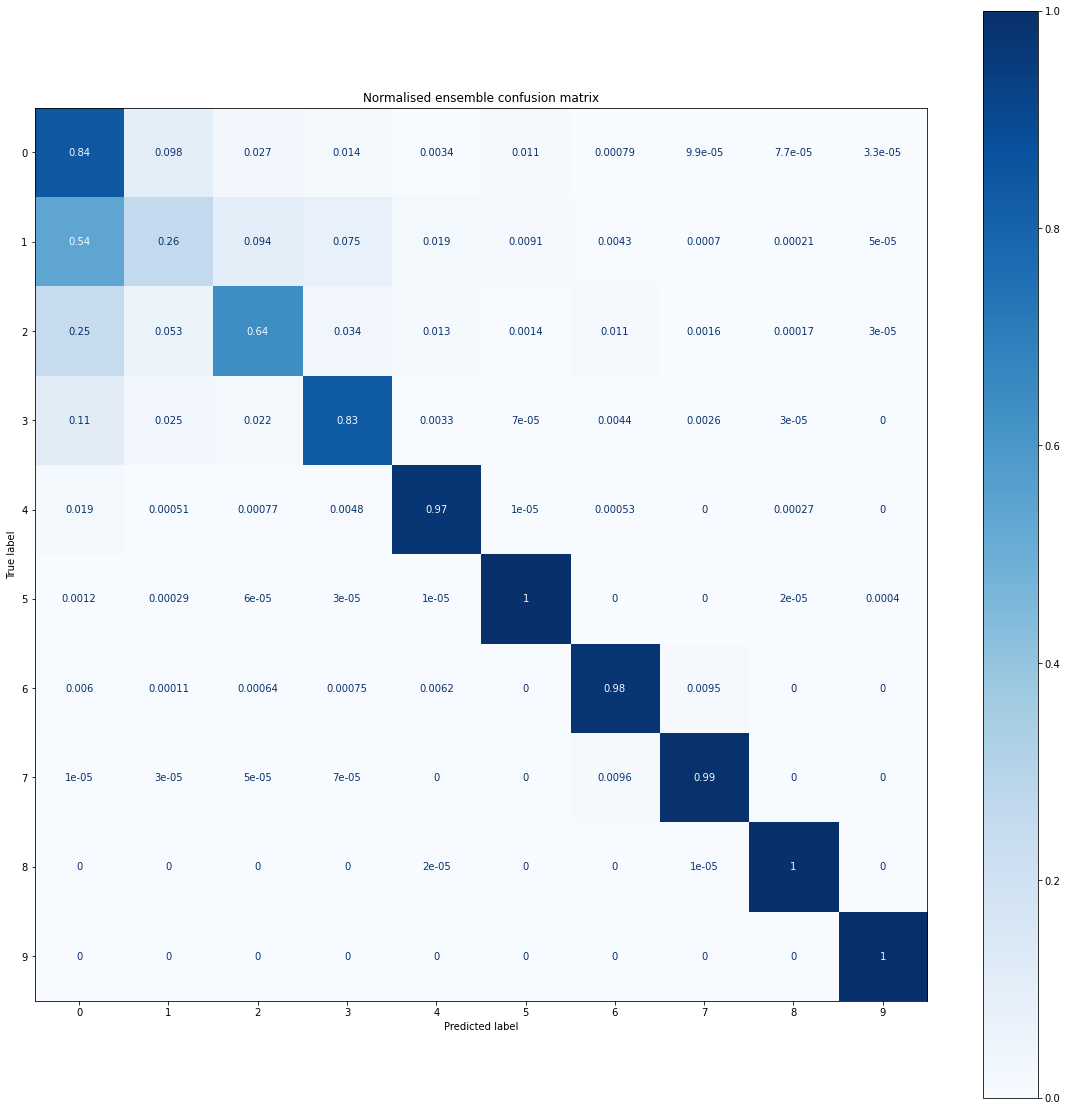

              precision    recall  f1-score   support

           0       0.45      0.86      0.59     90877
           1       0.41      0.30      0.35    100242
           2       0.75      0.42      0.54    100242
           3       0.79      0.66      0.72    100242
           4       0.89      0.90      0.89    100242
           5       1.00      1.00      1.00    100242
           6       0.88      0.89      0.89    100242
           7       0.96      0.97      0.96    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.80    993054
   macro avg       0.81      0.80      0.79    993054
weighted avg       0.81      0.80      0.79    993054



Analysis
[[8.56916492e-01 1.17972644e-01 1.35237739e-02 6.08514806e-03
  3.02606820e-03 1.61757100e-03 7.81275790e-04 3.30116531e-05
  3.30116531e-05 1.10038844e-05]
 [5.50517747e-01 2.99495222e-01 6.14313362e-02 5.33708426e-02
  2.6286386

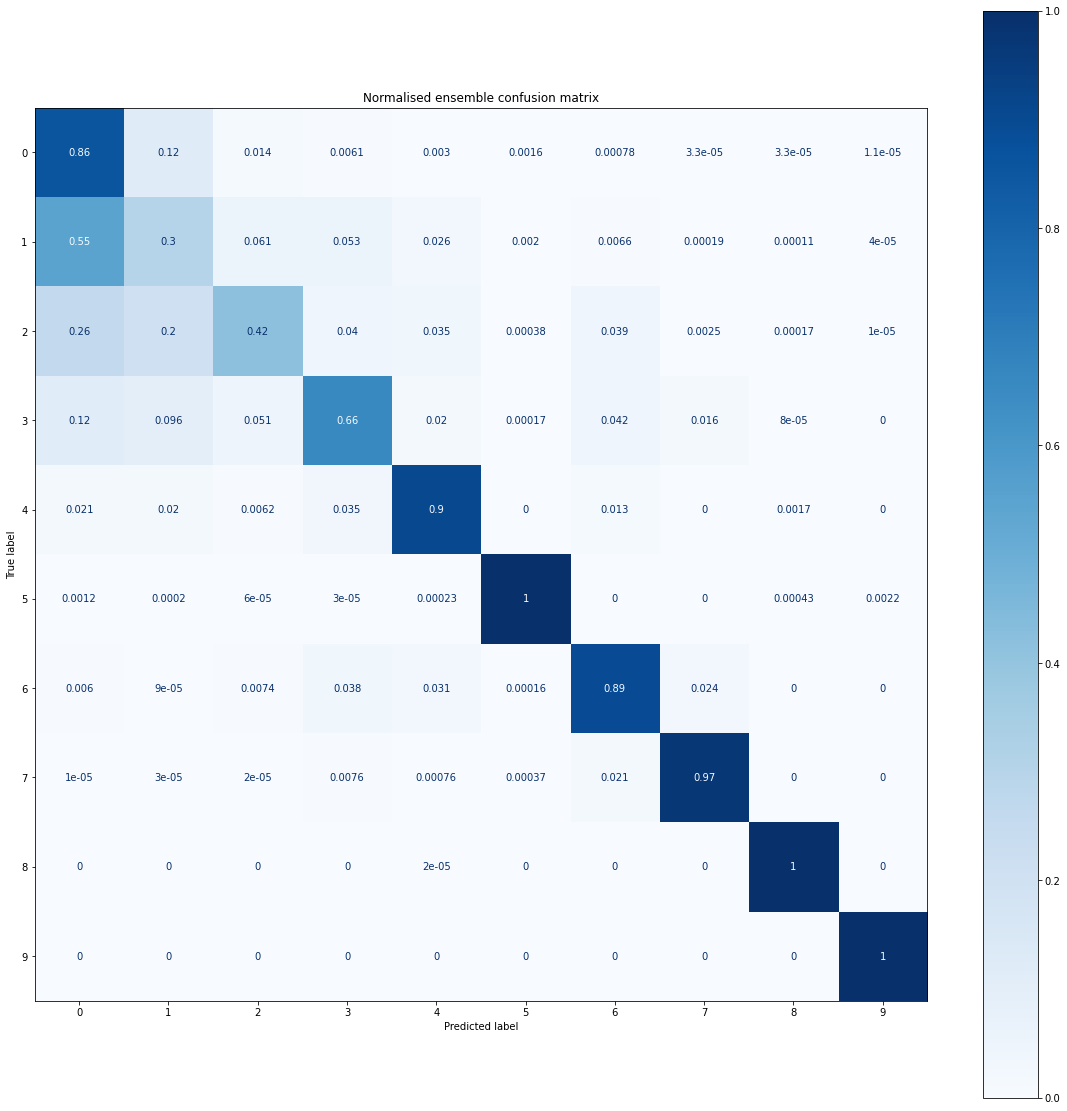

              precision    recall  f1-score   support

           0       0.50      0.83      0.62     90877
           1       0.33      0.22      0.27    100242
           2       0.41      0.10      0.16    100242
           3       0.51      0.44      0.47    100242
           4       0.71      0.87      0.78    100242
           5       0.99      1.00      0.99    100242
           6       0.65      0.86      0.74    100242
           7       0.91      0.95      0.93    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.73    993054
   macro avg       0.70      0.73      0.70    993054
weighted avg       0.70      0.73      0.70    993054



Analysis
[[8.26490751e-01 1.17103337e-01 2.28990834e-02 1.72210790e-02
  1.07287873e-02 8.47299097e-04 4.68765474e-03 2.20077687e-05
  0.00000000e+00 0.00000000e+00]
 [4.83090920e-01 2.22601305e-01 6.25785599e-02 1.20019553e-01
  7.3641786

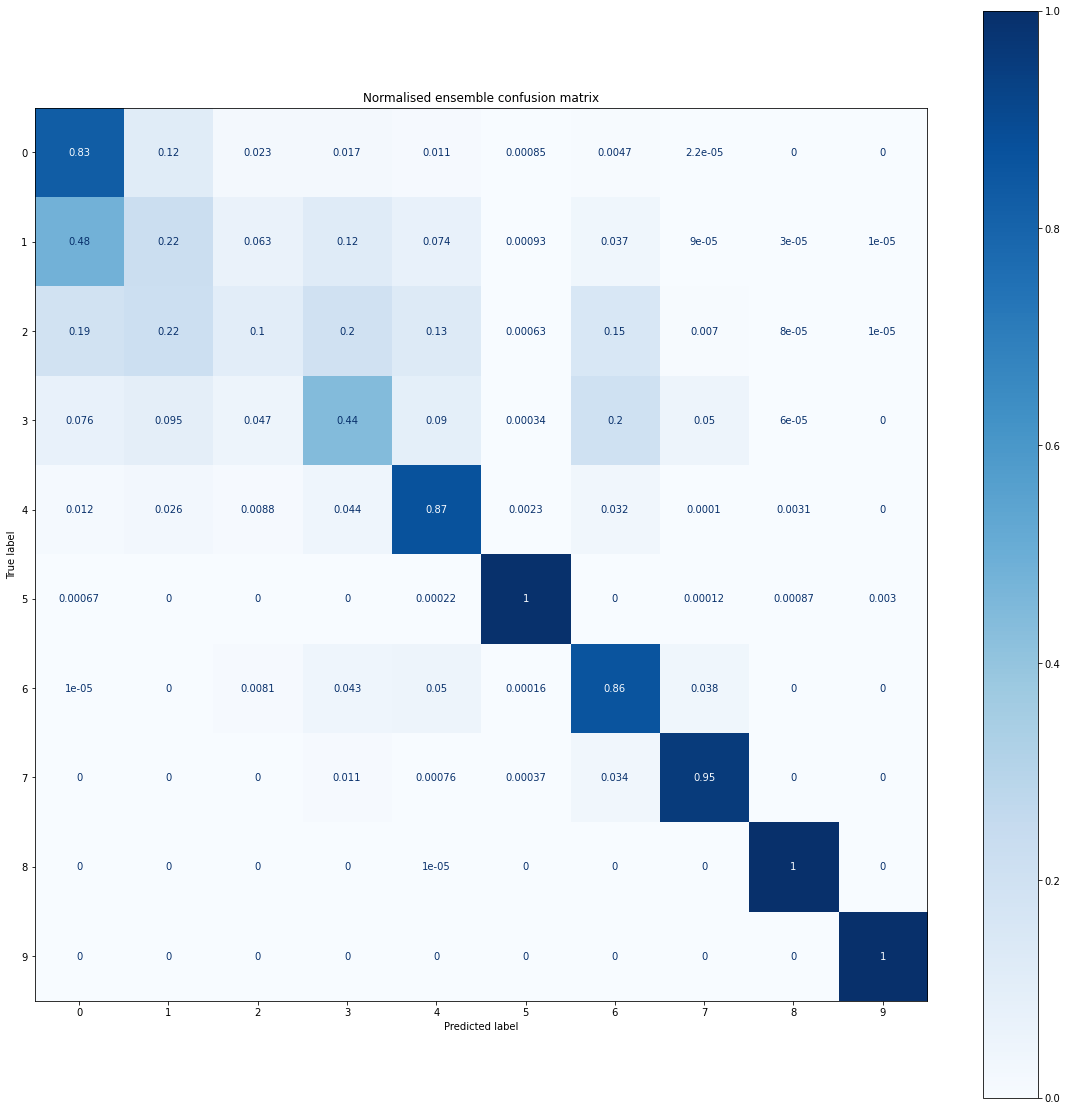

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     90877
           1       0.61      0.39      0.48    100242
           2       0.79      0.82      0.81    100242
           3       0.85      0.93      0.89    100242
           4       0.96      1.00      0.98    100242
           5       0.96      1.00      0.98    100242
           6       0.98      1.00      0.99    100242
           7       1.00      1.00      1.00    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.89    993054
   macro avg       0.88      0.88      0.88    993054
weighted avg       0.88      0.89      0.88    993054



Analysis
[[7.09431429e-01 1.78791113e-01 5.40180684e-02 2.56610584e-02
  4.14846441e-03 2.61892448e-02 1.49652827e-03 1.10038844e-04
  1.21042728e-04 3.30116531e-05]
 [3.18658846e-01 3.93896770e-01 1.43841903e-01 9.87111191e-02
  2.0719857

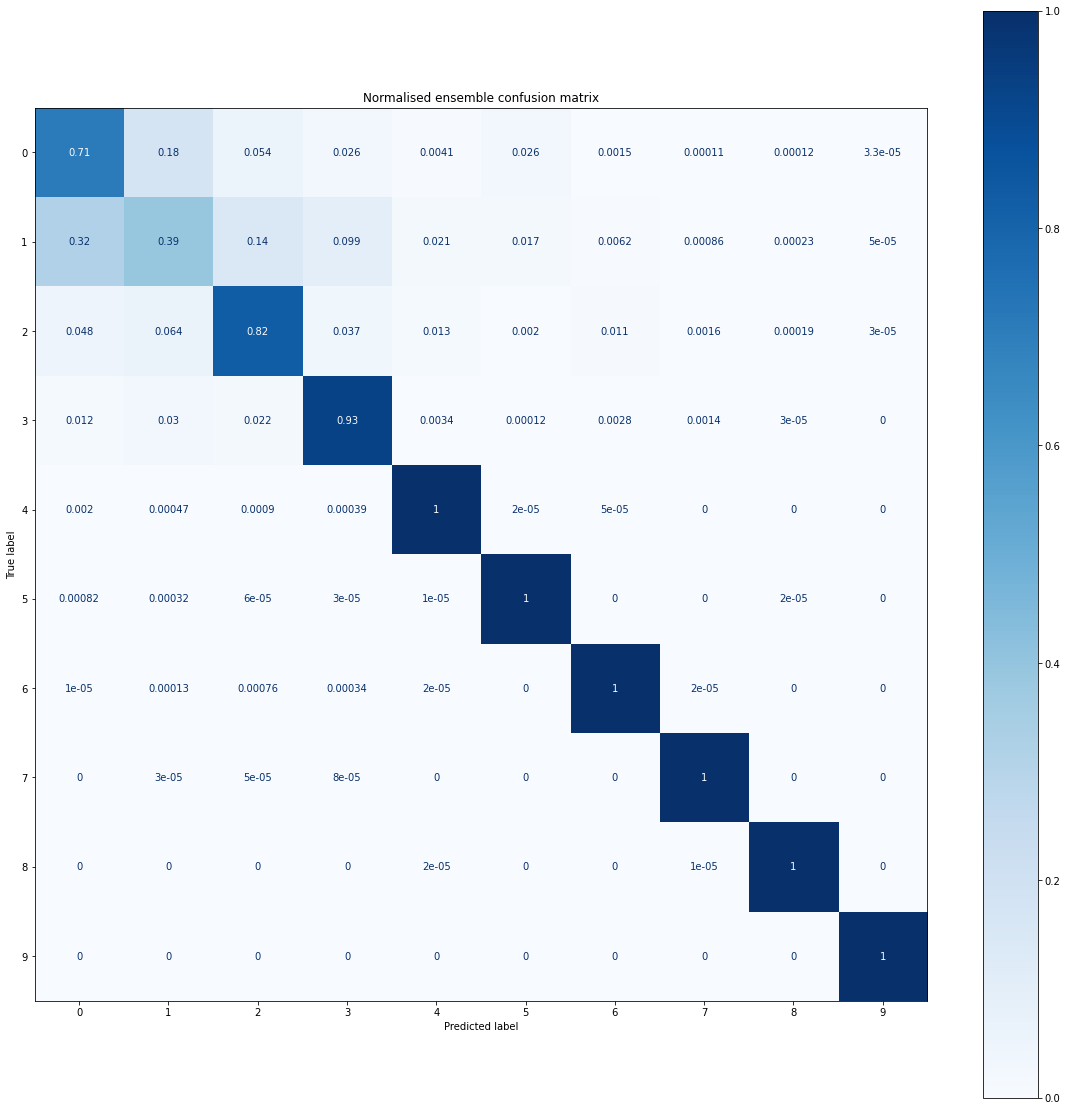

              precision    recall  f1-score   support

           0       0.51      0.83      0.63     90877
           1       0.62      0.29      0.40    100242
           2       0.81      0.70      0.75    100242
           3       0.86      0.87      0.87    100242
           4       0.95      0.98      0.97    100242
           5       0.97      1.00      0.99    100242
           6       0.97      0.98      0.98    100242
           7       0.99      0.99      0.99    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.86    993054
   macro avg       0.87      0.86      0.86    993054
weighted avg       0.87      0.86      0.86    993054



Analysis
[[8.28372415e-01 1.04558909e-01 3.15041210e-02 1.64508071e-02
  3.82935176e-03 1.41509953e-02 9.02318518e-04 9.90349593e-05
  9.90349593e-05 3.30116531e-05]
 [4.77105405e-01 2.91913569e-01 1.09973863e-01 8.28594801e-02
  2.0370702

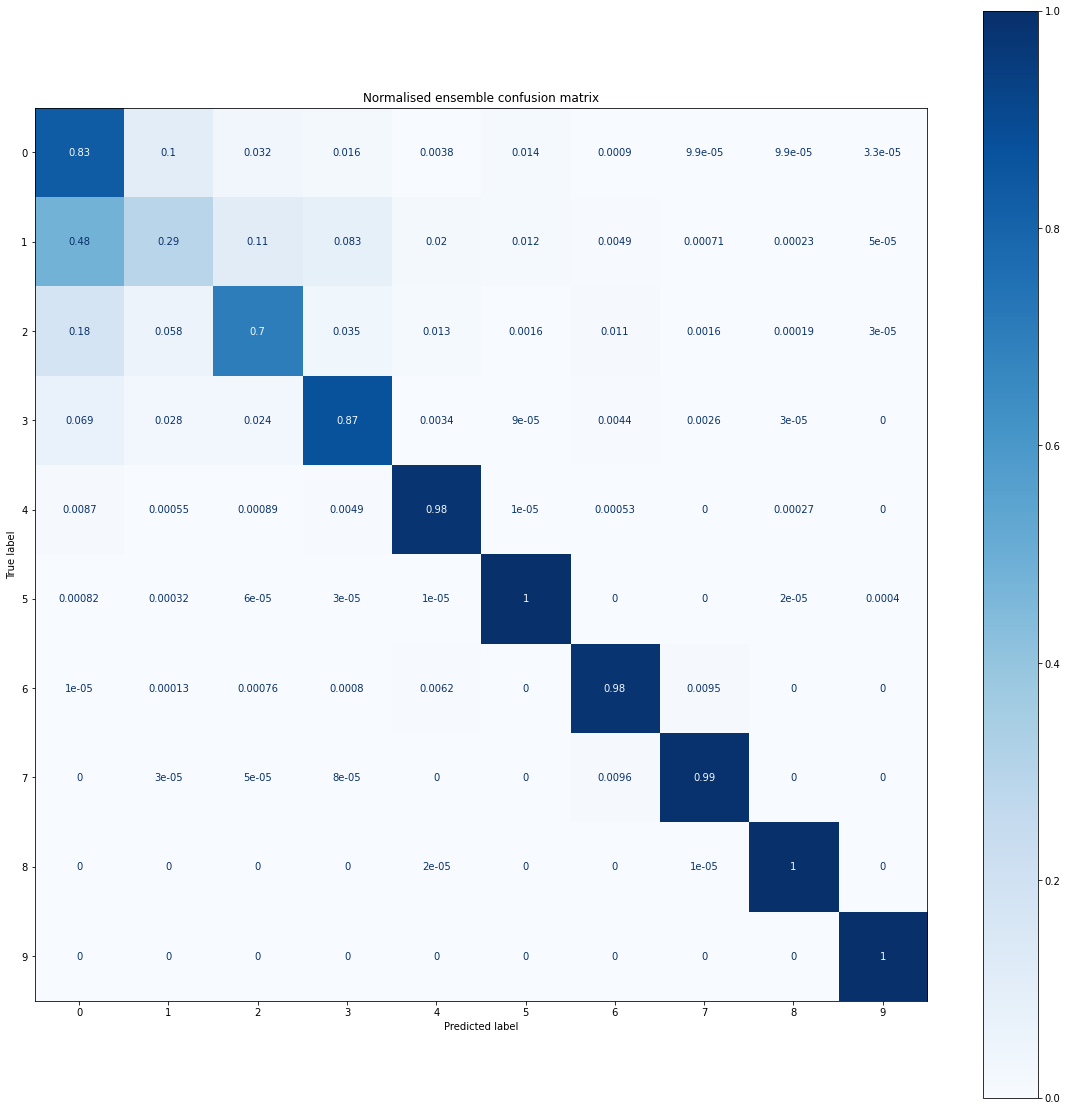

              precision    recall  f1-score   support

           0       0.50      0.84      0.63     90877
           1       0.41      0.35      0.38    100242
           2       0.74      0.45      0.56    100242
           3       0.78      0.68      0.73    100242
           4       0.88      0.91      0.89    100242
           5       1.00      1.00      1.00    100242
           6       0.88      0.89      0.89    100242
           7       0.96      0.97      0.96    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.81    993054
   macro avg       0.81      0.81      0.80    993054
weighted avg       0.82      0.81      0.80    993054





In [0]:

# FOR ALREADY PRE FITTED CLASSIFIERS
# https://stackoverflow.com/questions/42920148/using-sklearn-voting-ensemble-with-partial-fit    
# https://sebastianraschka.com/Articles/2014_ensemble_classifier.html#ensembleclassifier---tuning-weights
# eclf = EnsembleVoteClassifier(
#                               clfs=[clf1, clf2, clf3, clf4],
#                               voting="soft",
#                               refit=False
                            
#                             )


# eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))



np.random.seed(123)

df = pd.DataFrame(columns=('w1', 'w2', 'w3', 'w4','precision', 'recall', 'val_acc', 'f1'))

i = 0
j = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
          for w4 in range(1,4):
            if len(set((w1,w2,w3,w4))) == 1 and j==0: # calculate results for equal weights once and then skip if all weights are equal j used for it
                j = 1
            elif len(set((w1,w2,w3,w4))) == 1 and j==1:
                continue     

            eclf = EnsembleVoteClassifier(
                                      clfs=[clf1, clf2, clf3,clf4], 
                                      weights=[w1,w2,w3,w4], 
                                      voting='hard', 
                                      refit=False
                                      )
            
            eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))#NOT fitting actually

            y_pred = eclf.predict(X_val)
     
            print(classification_report(y_val,y_pred))
            print("\n")
            fig, ax = plt.subplots(figsize=(20, 20))    
            disp = plot_confusion_matrix(eclf, 
                                         X_val, 
                                         y_val,
                                            ax = ax,
                                            cmap=plt.cm.Blues,
                                            normalize='true')
            disp.ax_.set_title('Normalised ensemble confusion matrix')

            print('Analysis')
            print(disp.confusion_matrix)
            plt.show()
            

            precision = precision_score(y_val,y_pred,average='micro')
            recall = recall_score(y_val,y_pred,average='micro')
            accuracy = accuracy_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred,average='macro')

            df.loc[i] = [w1, w2, w3,w4, precision, recall , accuracy, f1]
            i += 1

df.sort(columns=['f1', 'val_acc'], ascending=False)
# group / ensemble of models 

  
# Voting Classifier with hard voting 
  
# eclf = EnsembleVoteClassifier(
#         estimators=[('svm', clf1), ('lr', clf2), ('dt', clf3),('mlp', clf4)],
#         voting='hard',
#         refit = false,
#         )

# eclf.fit(X_train, y_train) 
  

              precision    recall  f1-score   support

           0       0.25      0.93      0.39     90877
           1       0.52      0.12      0.19    100242
           2       0.77      0.13      0.23    100242
           3       0.83      0.43      0.56    100242
           4       0.90      0.85      0.88    100242
           5       1.00      0.66      0.80    100242
           6       0.86      0.84      0.85    100242
           7       0.83      0.95      0.89    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.68    993054
   macro avg       0.80      0.68      0.67    993054
weighted avg       0.80      0.68      0.67    993054



Analysis
[[9.28694829e-01 5.55696161e-02 5.95310144e-03 4.21448771e-03
  2.58591283e-03 1.24343893e-03 1.38648943e-03 2.64093225e-04
  3.30116531e-05 5.50194219e-05]
 [7.91993376e-01 1.19181581e-01 2.03407753e-02 3.39578221e-02
  2.3243750

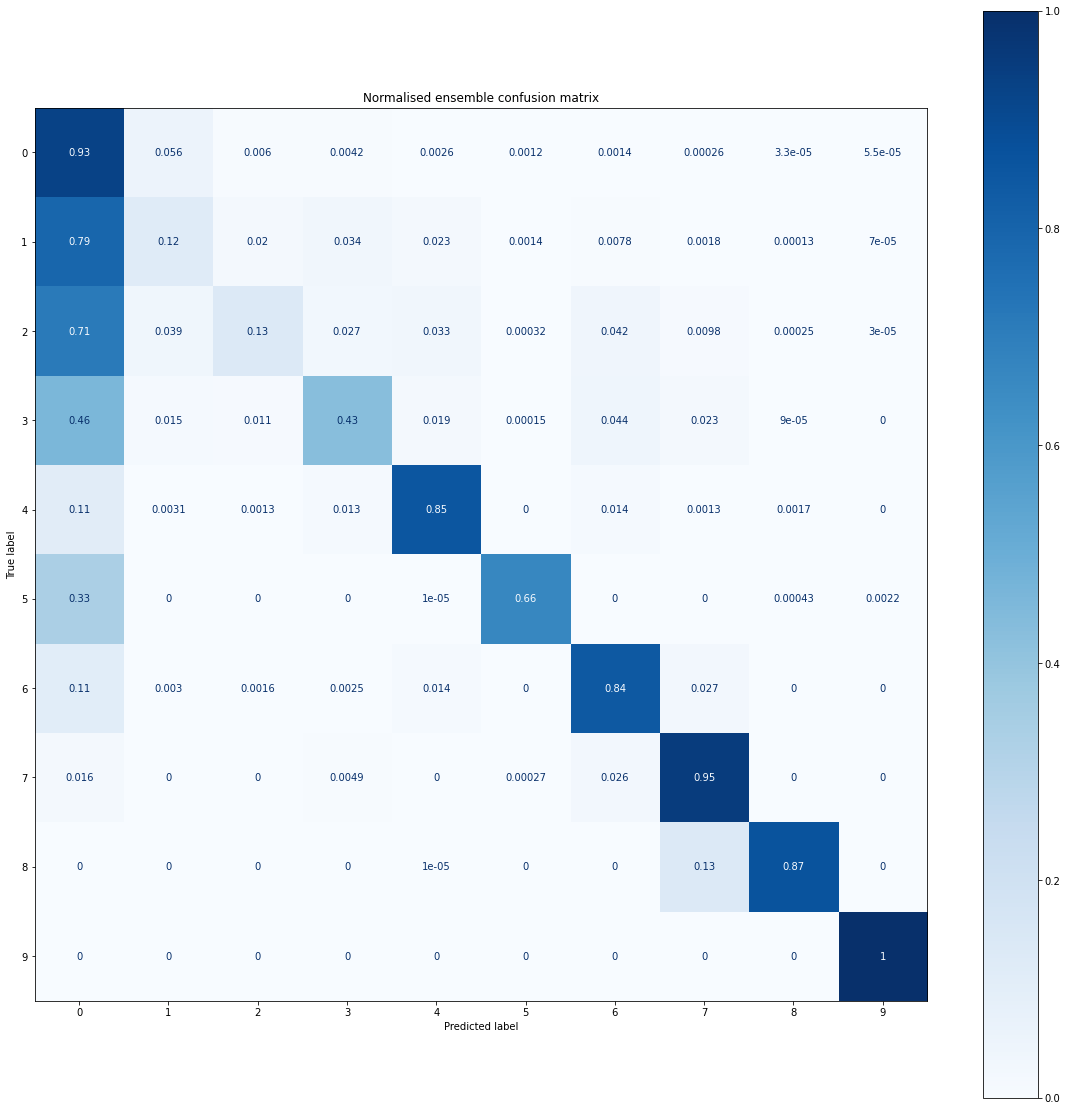

0.6718110435229969
              precision    recall  f1-score   support

           0       0.45      0.84      0.59     90877
           1       0.61      0.26      0.37    100242
           2       0.82      0.64      0.72    100242
           3       0.87      0.83      0.85    100242
           4       0.96      0.97      0.97    100242
           5       0.98      1.00      0.99    100242
           6       0.97      0.98      0.97    100242
           7       0.99      0.99      0.99    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.85    993054
   macro avg       0.86      0.85      0.84    993054
weighted avg       0.87      0.85      0.85    993054



Analysis
[[8.44779207e-01 9.84627574e-02 2.69595167e-02 1.43160536e-02
  3.40020027e-03 1.10809116e-02 7.92279675e-04 9.90349593e-05
  7.70271906e-05 3.30116531e-05]
 [5.36022825e-01 2.61417370e-01 9.41322001e-02 7.45695

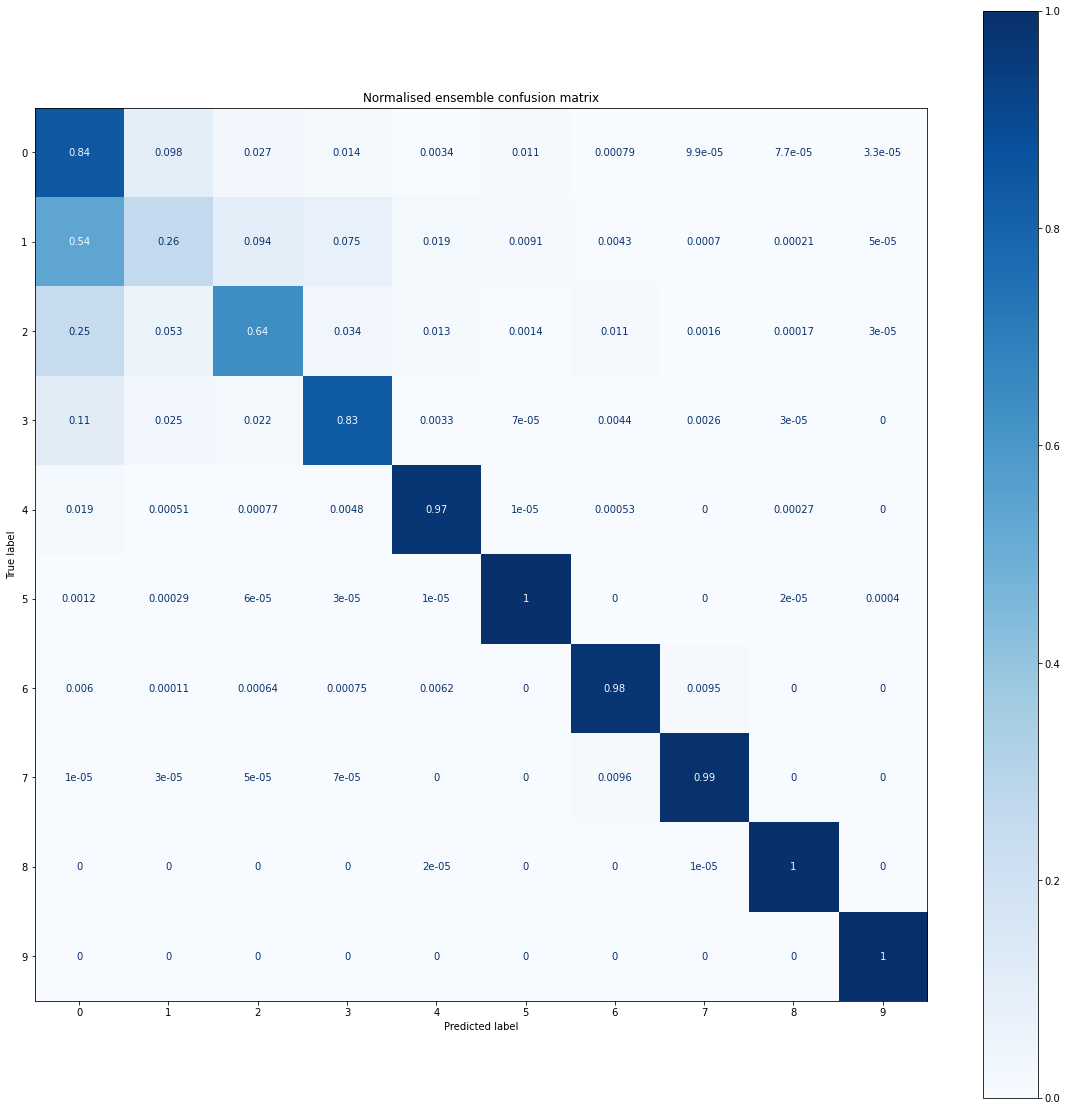

0.8437305564999302
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     90877
           1       0.61      0.39      0.48    100242
           2       0.79      0.82      0.81    100242
           3       0.85      0.93      0.89    100242
           4       0.96      1.00      0.98    100242
           5       0.96      1.00      0.98    100242
           6       0.98      1.00      0.99    100242
           7       1.00      1.00      1.00    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.89    993054
   macro avg       0.88      0.88      0.88    993054
weighted avg       0.88      0.89      0.88    993054



Analysis
[[7.09431429e-01 1.78791113e-01 5.40180684e-02 2.56610584e-02
  4.14846441e-03 2.61892448e-02 1.49652827e-03 1.10038844e-04
  1.21042728e-04 3.30116531e-05]
 [3.18658846e-01 3.93896770e-01 1.43841903e-01 9.87111

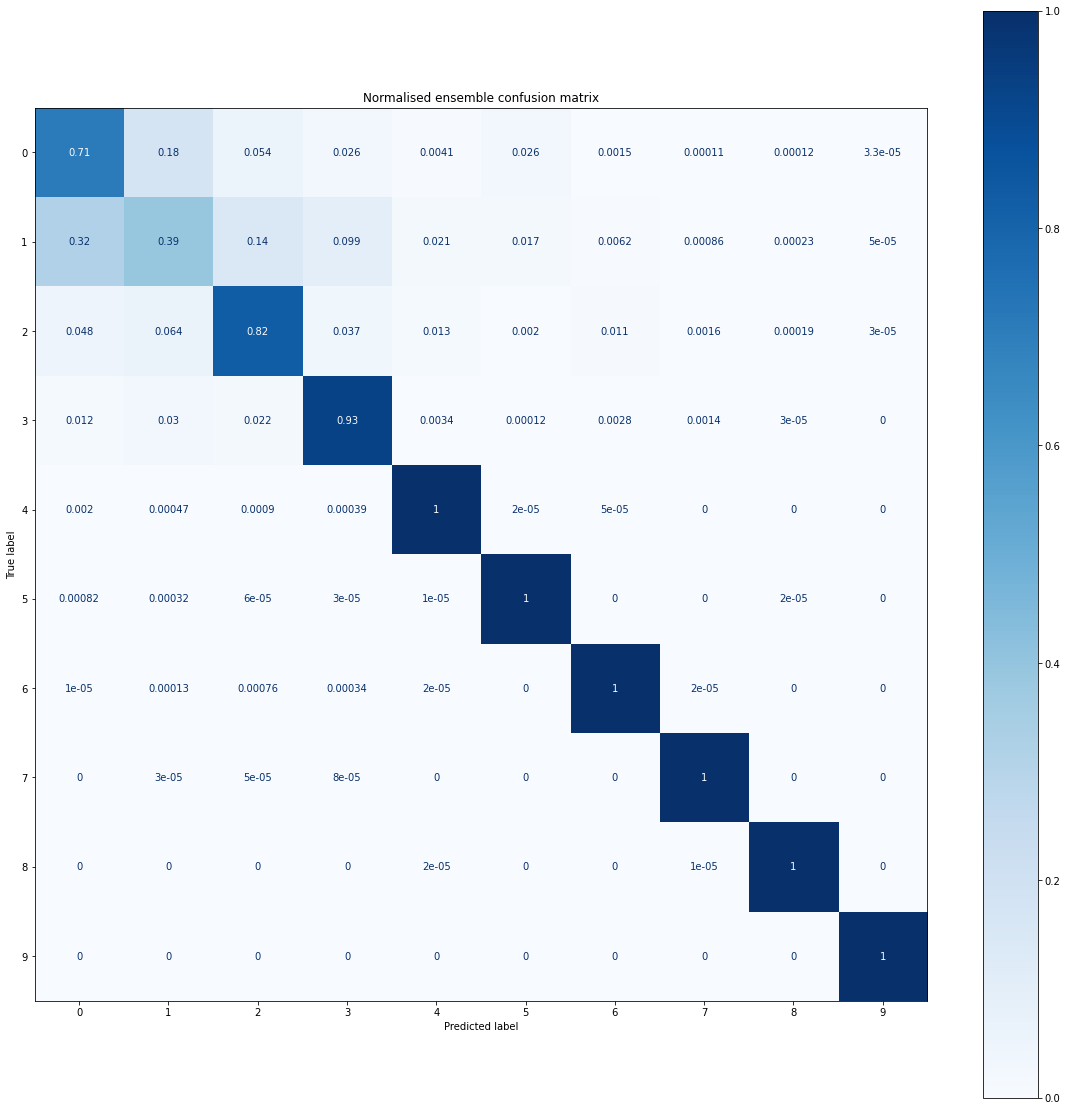

0.8783400736176272
              precision    recall  f1-score   support

           0       0.31      0.85      0.45     90877
           1       0.52      0.10      0.17    100242
           2       0.49      0.09      0.15    100242
           3       0.81      0.37      0.50    100242
           4       0.59      0.69      0.63    100242
           5       0.62      0.61      0.61    100242
           6       0.82      0.63      0.71    100242
           7       0.51      0.68      0.58    100242
           8       0.69      0.78      0.73    100241
           9       0.87      1.00      0.93    100242

    accuracy                           0.58    993054
   macro avg       0.62      0.58      0.55    993054
weighted avg       0.63      0.58      0.55    993054



Analysis
[[8.54154517e-01 4.93524214e-02 7.87878121e-03 4.45657317e-03
  1.38979060e-02 1.20272456e-02 4.78668970e-03 2.23488892e-02
  2.08413570e-02 1.02556202e-02]
 [5.98731071e-01 1.00197522e-01 1.99417410e-02 2.86805

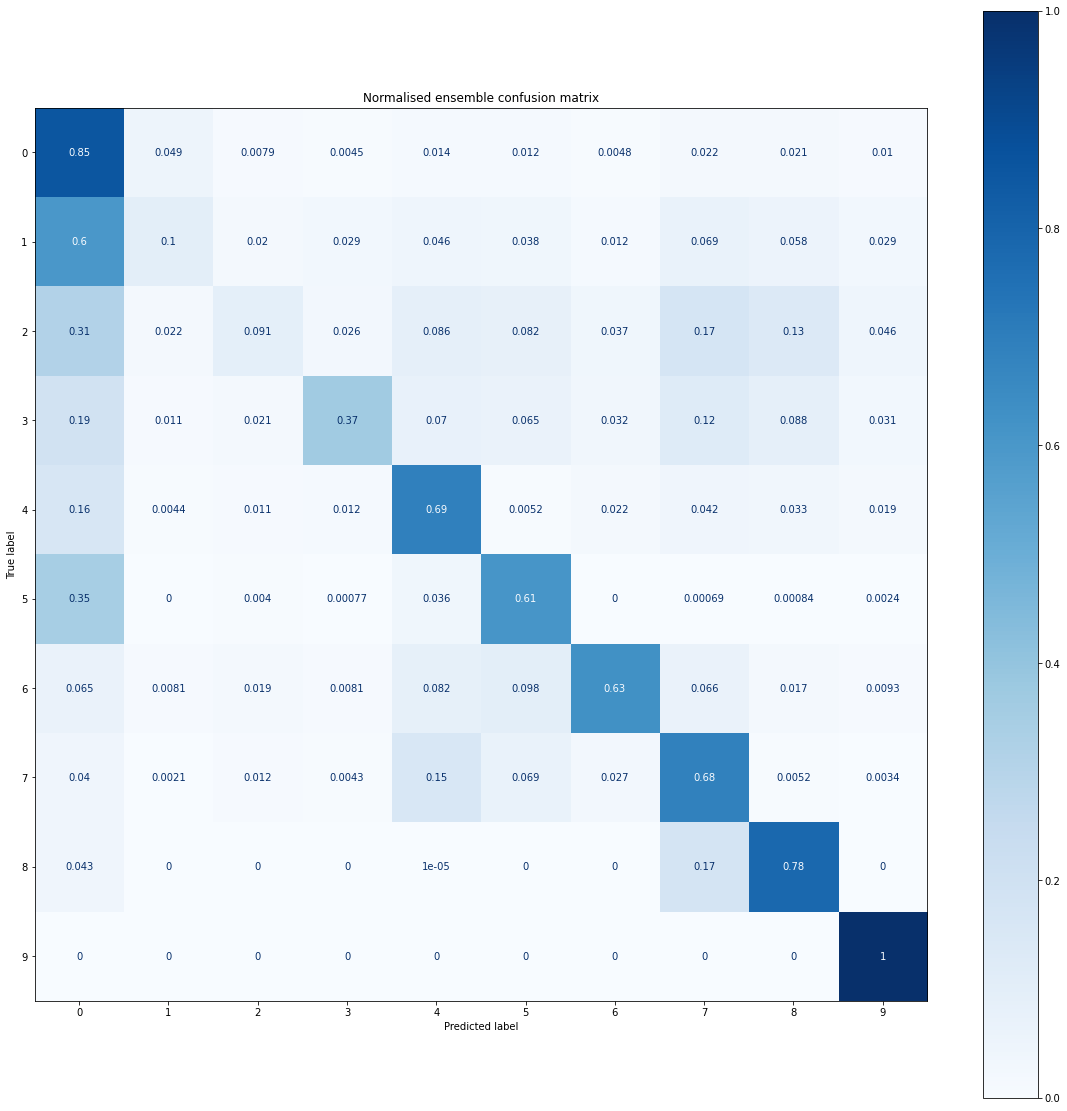

0.5482637247312204
              precision    recall  f1-score   support

           0       0.34      0.87      0.49     90877
           1       0.59      0.21      0.31    100242
           2       0.80      0.56      0.66    100242
           3       0.86      0.72      0.79    100242
           4       0.90      0.93      0.92    100242
           5       0.95      0.67      0.78    100242
           6       0.95      0.89      0.92    100242
           7       0.83      0.96      0.89    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.77    993054
   macro avg       0.82      0.77      0.77    993054
weighted avg       0.83      0.77      0.77    993054



Analysis
[[8.67700298e-01 7.74783499e-02 2.57160778e-02 1.29295641e-02
  5.00676739e-03 9.17723957e-03 1.54054381e-03 3.41120416e-04
  3.30116531e-05 7.70271906e-05]
 [6.00317232e-01 2.10510564e-01 8.31088765e-02 6.51224

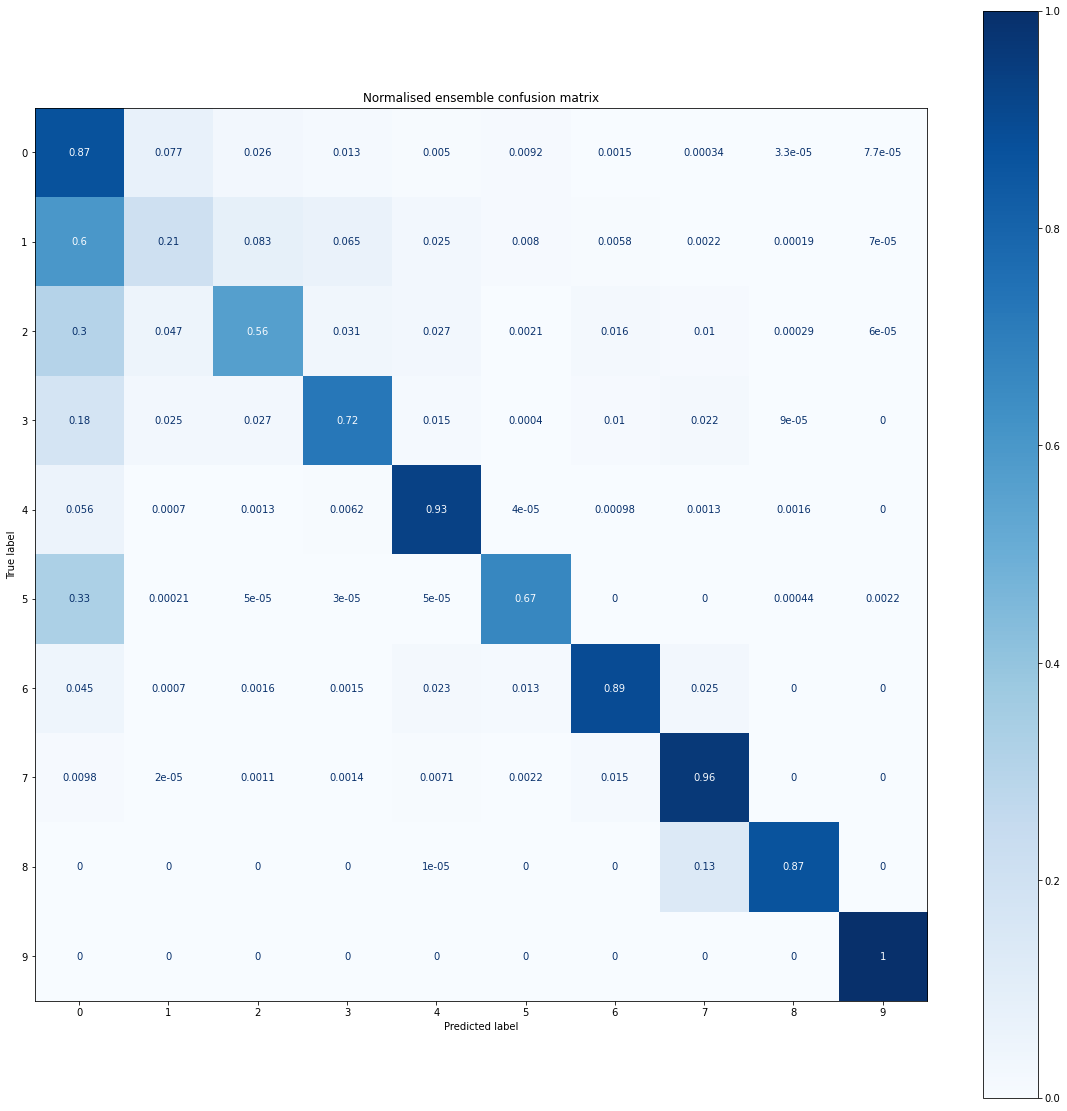

0.7685977347722043
              precision    recall  f1-score   support

           0       0.53      0.73      0.62     90877
           1       0.60      0.36      0.45    100242
           2       0.80      0.76      0.78    100242
           3       0.86      0.88      0.87    100242
           4       0.96      0.99      0.97    100242
           5       0.97      1.00      0.98    100242
           6       0.98      0.98      0.98    100242
           7       0.99      1.00      0.99    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.87    993054
   macro avg       0.87      0.87      0.86    993054
weighted avg       0.87      0.87      0.87    993054



Analysis
[[7.31318155e-01 1.69008660e-01 4.86591767e-02 2.33062271e-02
  3.70830903e-03 2.23488892e-02 1.40849720e-03 1.10038844e-04
  9.90349593e-05 3.30116531e-05]
 [3.84718980e-01 3.58901458e-01 1.26444006e-01 8.97727

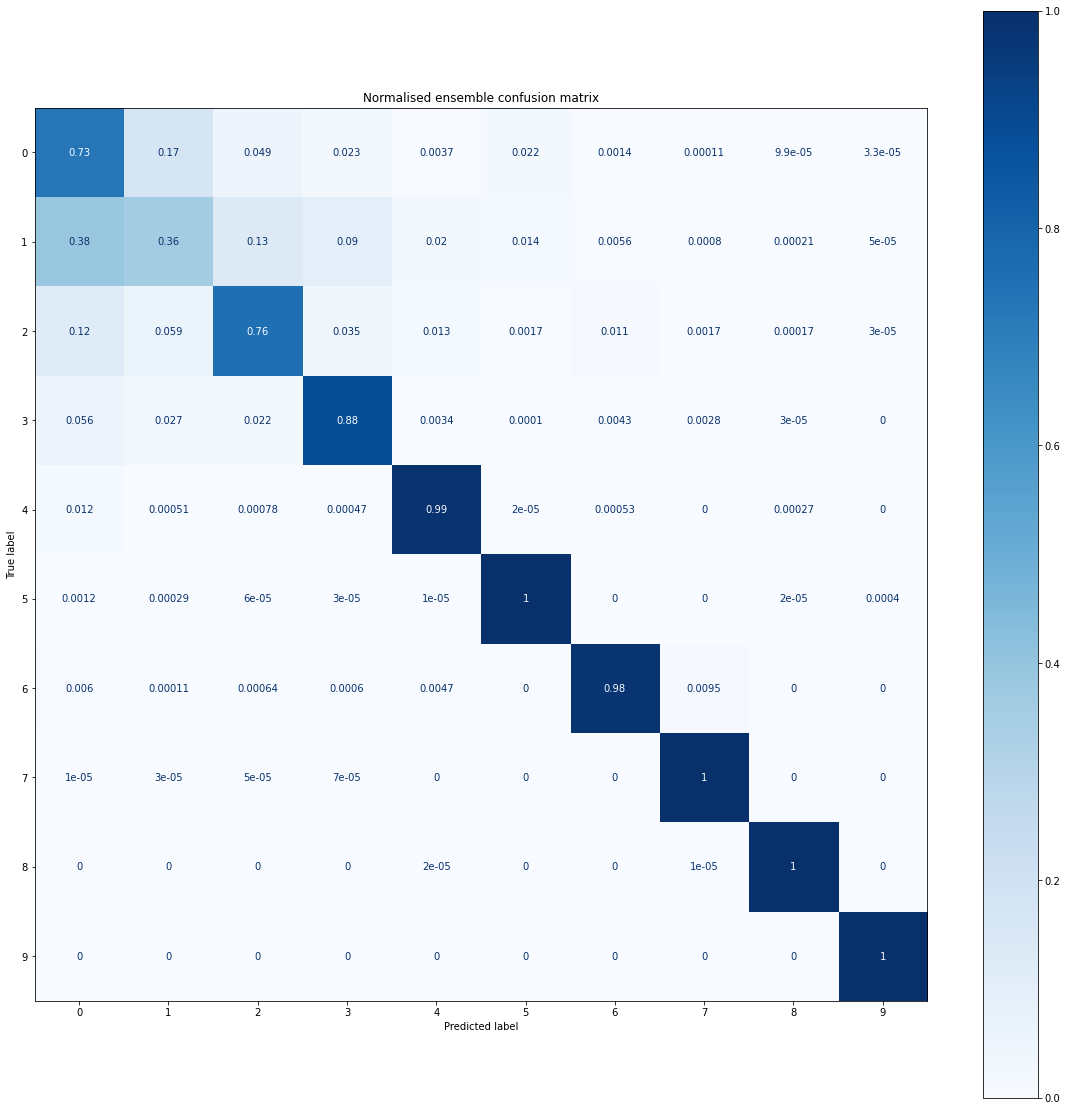

0.8634395911504141
              precision    recall  f1-score   support

           0       0.25      0.58      0.35     90877
           1       0.17      0.01      0.02    100242
           2       0.17      0.02      0.04    100242
           3       0.41      0.03      0.06    100242
           4       0.23      0.19      0.21    100242
           5       0.08      0.06      0.07    100242
           6       0.39      0.10      0.16    100242
           7       0.22      0.43      0.29    100242
           8       0.29      0.64      0.40    100241
           9       0.65      1.00      0.79    100242

    accuracy                           0.30    993054
   macro avg       0.29      0.31      0.24    993054
weighted avg       0.29      0.30      0.24    993054



Analysis
[[5.79046403e-01 5.78804318e-03 1.34797584e-02 4.39054986e-03
  5.15972138e-02 5.49203869e-02 1.75621995e-02 1.13218966e-01
  1.06671655e-01 5.33248237e-02]
 [3.59968875e-01 7.89090401e-03 1.87845414e-02 7.52179

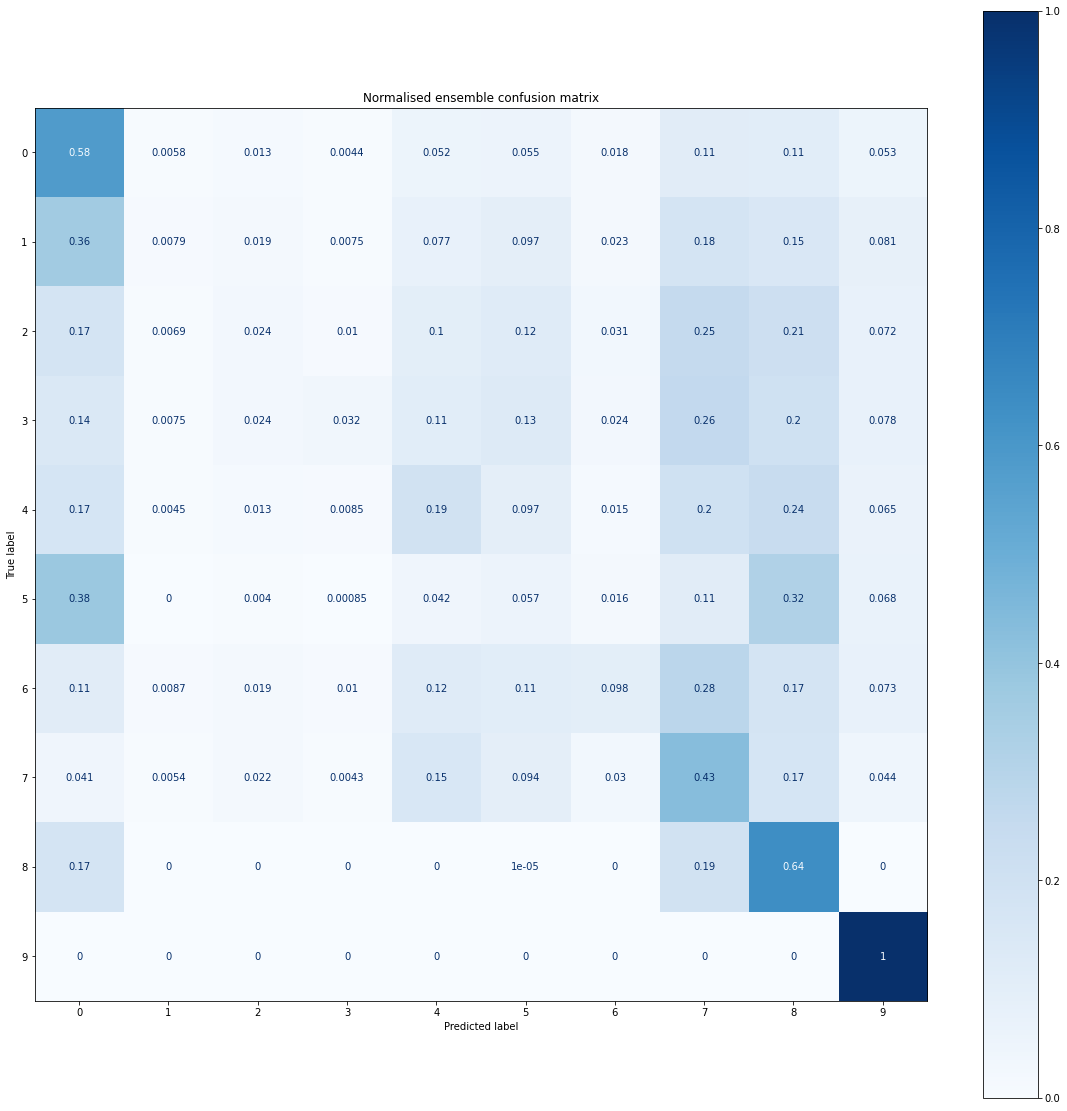

0.2374132809699577


In [0]:
# IF PREVIOUS CELL IS EXECUTED FULLY NO NEED TO EXECUTE THIS MINE STOPPED AFTER 9 searches 
# FOR ALREADY PRE FITTED CLASSIFIERS
# https://stackoverflow.com/questions/42920148/using-sklearn-voting-ensemble-with-partial-fit    
# https://sebastianraschka.com/Articles/2014_ensemble_classifier.html#ensembleclassifier---tuning-weights
# eclf = EnsembleVoteClassifier(
#                               clfs=[clf1, clf2, clf3, clf4],
#                               voting="soft",
#                               refit=False
                            
#                             )


# eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))



np.random.seed(123)

df1 = pd.DataFrame(columns=('w1', 'w2', 'w3','precision', 'recall', 'val_acc', 'f1'))

            # IT WAS FOUND THAT ON INCREASING W4 , F1 DECREASES, hence don't grid search w4 due to time constraint
i = 0
j = 0
for w1 in range(1,4):
    for w2 in range(1,4):
         for w3 in range(1,4):
          
            if len(set((w1,w2,w3))) == 1 and j==0: # calculate results for equal weights once and then skip if all weights are equal j used for it
                j = 1
            elif len(set((w1,w2,w3))) == 1 and j==1:
                continue    

            eclf = EnsembleVoteClassifier(
                                      clfs=[clf1, clf2, clf3,clf4], 
                                      weights=[w1,w2,w3,1], 
                                      voting='hard', 
                                      refit=False
                                      )
            
            eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))#NOT fitting actually

            y_pred = eclf.predict(X_val)
     
            print(classification_report(y_val,y_pred))
            print("\n")
            fig, ax = plt.subplots(figsize=(20, 20))    
            disp = plot_confusion_matrix(eclf, 
                                         X_val, 
                                         y_val,
                                            ax = ax,
                                            cmap=plt.cm.Blues,
                                            normalize='true')
            disp.ax_.set_title('Normalised ensemble confusion matrix')

            print('Analysis')
            print(disp.confusion_matrix)
            plt.show()
            

            precision = precision_score(y_val,y_pred,average='micro')
            recall = recall_score(y_val,y_pred,average='micro')
            accuracy = accuracy_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred,average='macro')
            print(f1)
            df1.loc[i] = [w1, w2, w3,precision, recall , accuracy, f1]
            i += 1

df1.sort(columns=['f1', 'val_acc'], ascending=False)
# group / ensemble of models 

  
# Voting Classifier with hard voting 
  
# eclf = EnsembleVoteClassifier(
#         estimators=[('svm', clf1), ('lr', clf2), ('dt', clf3),('mlp', clf4)],
#         voting='hard',
#         refit = false,
#         )

# eclf.fit(X_train, y_train) 


8
              precision    recall  f1-score   support

           0       0.32      0.74      0.45     90877
           1       0.53      0.10      0.17    100242
           2       0.47      0.09      0.15    100242
           3       0.84      0.36      0.51    100242
           4       0.57      0.69      0.62    100242
           5       0.58      0.61      0.59    100242
           6       0.85      0.63      0.72    100242
           7       0.46      0.68      0.55    100242
           8       0.61      0.78      0.68    100241
           9       0.82      1.00      0.90    100242

    accuracy                           0.57    993054
   macro avg       0.60      0.57      0.53    993054
weighted avg       0.61      0.57      0.54    993054



Analysis
[[7.40693465e-01 4.82300252e-02 1.04206785e-02 4.70966251e-03
  2.57931050e-02 2.48687787e-02 9.00117742e-03 5.26865984e-02
  5.25325440e-02 3.10639656e-02]
 [4.47427226e-01 9.90303466e-02 2.31739191e-02 2.54683666e-02
  5.87677

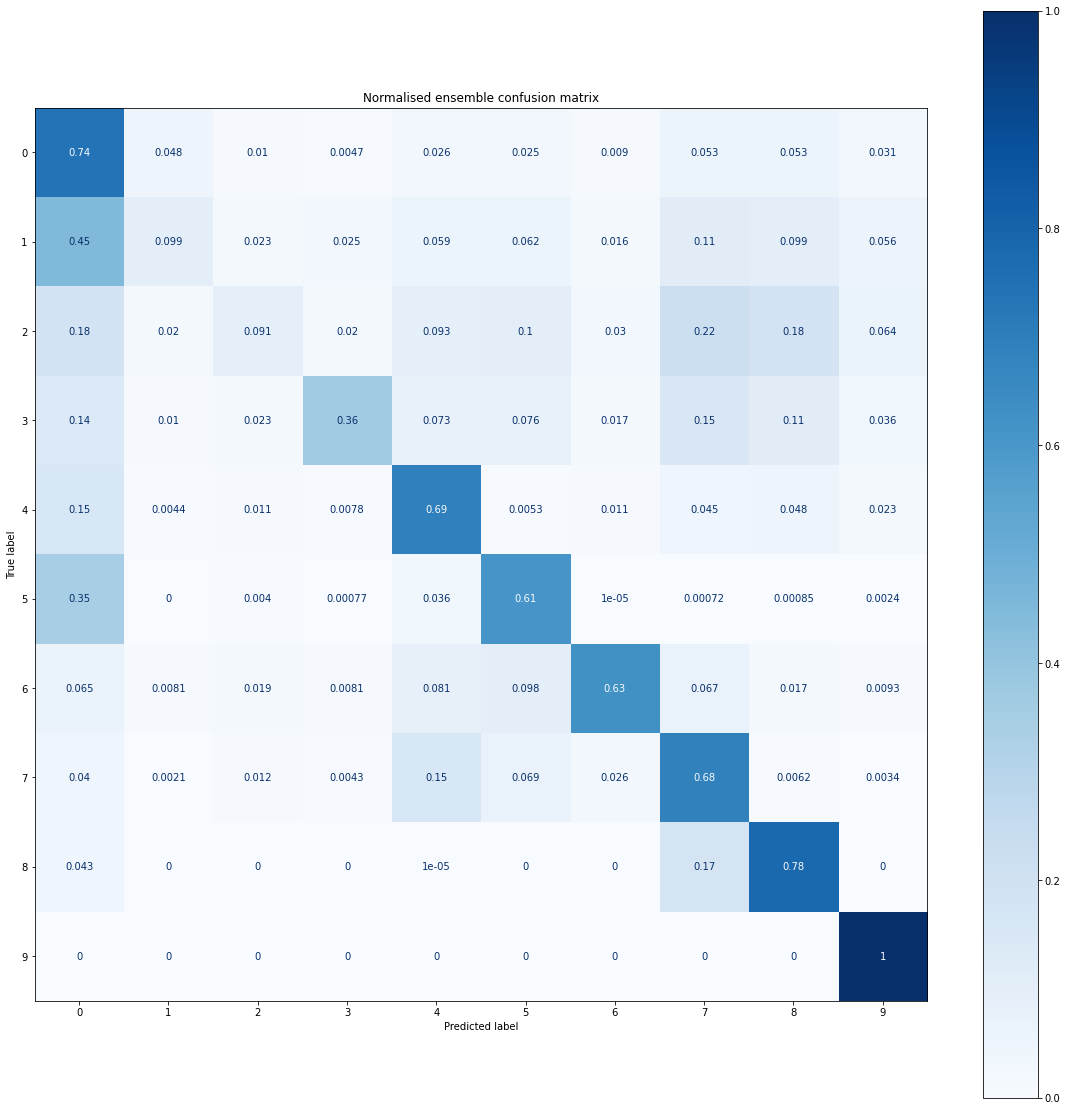

0.5346755721152487
9
              precision    recall  f1-score   support

           0       0.37      0.75      0.49     90877
           1       0.59      0.31      0.40    100242
           2       0.78      0.68      0.73    100242
           3       0.85      0.78      0.81    100242
           4       0.90      0.94      0.92    100242
           5       0.93      0.67      0.78    100242
           6       0.95      0.89      0.92    100242
           7       0.83      0.96      0.89    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.79    993054
   macro avg       0.82      0.78      0.79    993054
weighted avg       0.82      0.79      0.79    993054



Analysis
[[7.54239246e-01 1.48728501e-01 4.76578232e-02 2.17876911e-02
  6.42626847e-03 1.86295762e-02 2.05772638e-03 3.63128184e-04
  3.30116531e-05 7.70271906e-05]
 [4.49013388e-01 3.08663035e-01 1.15520441e-01 7.988

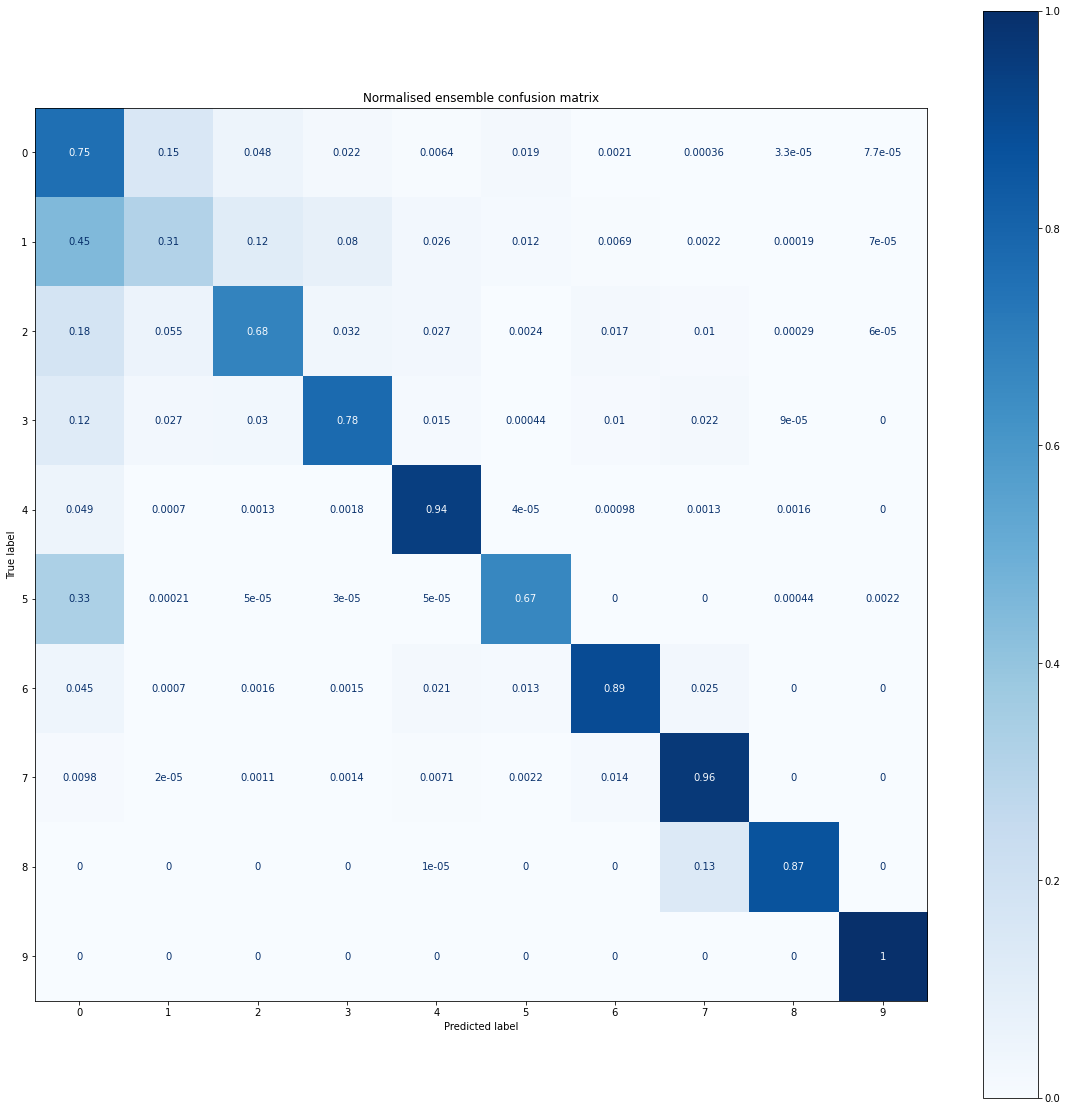

0.7871277230583699
10
              precision    recall  f1-score   support

           0       0.16      0.94      0.27     90877
           1       0.33      0.03      0.05    100242
           2       0.42      0.02      0.04    100242
           3       0.34      0.11      0.17    100242
           4       0.73      0.47      0.57    100242
           5       0.96      0.10      0.19    100242
           6       0.35      0.25      0.29    100242
           7       0.64      0.47      0.54    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.41    993054
   macro avg       0.59      0.42      0.40    993054
weighted avg       0.60      0.41      0.40    993054



Analysis
[[9.43076906e-01 1.57355547e-02 3.92838672e-03 2.05222444e-02
  1.55154770e-03 1.12239621e-03 1.34357428e-02 5.61198103e-04
  0.00000000e+00 6.60233062e-05]
 [8.67939586e-01 2.65956386e-02 9.11793460e-03 3.71

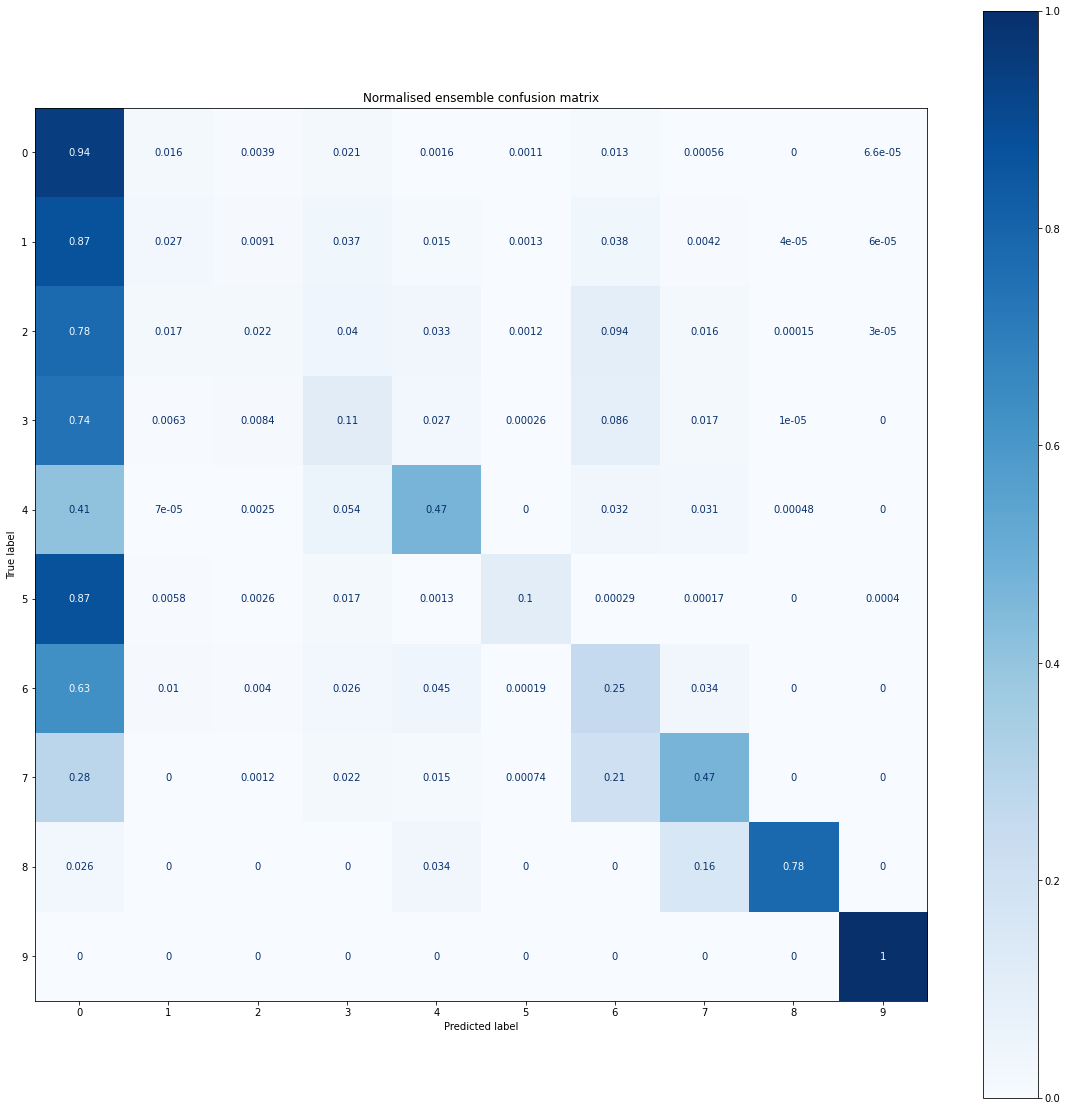

0.3999385649276593
11
              precision    recall  f1-score   support

           0       0.25      0.91      0.39     90877
           1       0.57      0.13      0.22    100242
           2       0.79      0.19      0.30    100242
           3       0.84      0.47      0.60    100242
           4       0.94      0.86      0.90    100242
           5       0.99      0.66      0.80    100242
           6       0.87      0.85      0.86    100242
           7       0.85      0.96      0.90    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.69    993054
   macro avg       0.81      0.69      0.69    993054
weighted avg       0.81      0.69      0.69    993054



Analysis
[[9.14796923e-01 6.31402885e-02 9.39731725e-03 7.50464914e-03
  1.85965646e-03 1.87066034e-03 1.07838067e-03 2.64093225e-04
  3.30116531e-05 5.50194219e-05]
 [7.66096048e-01 1.34364837e-01 3.13840506e-02 3.93

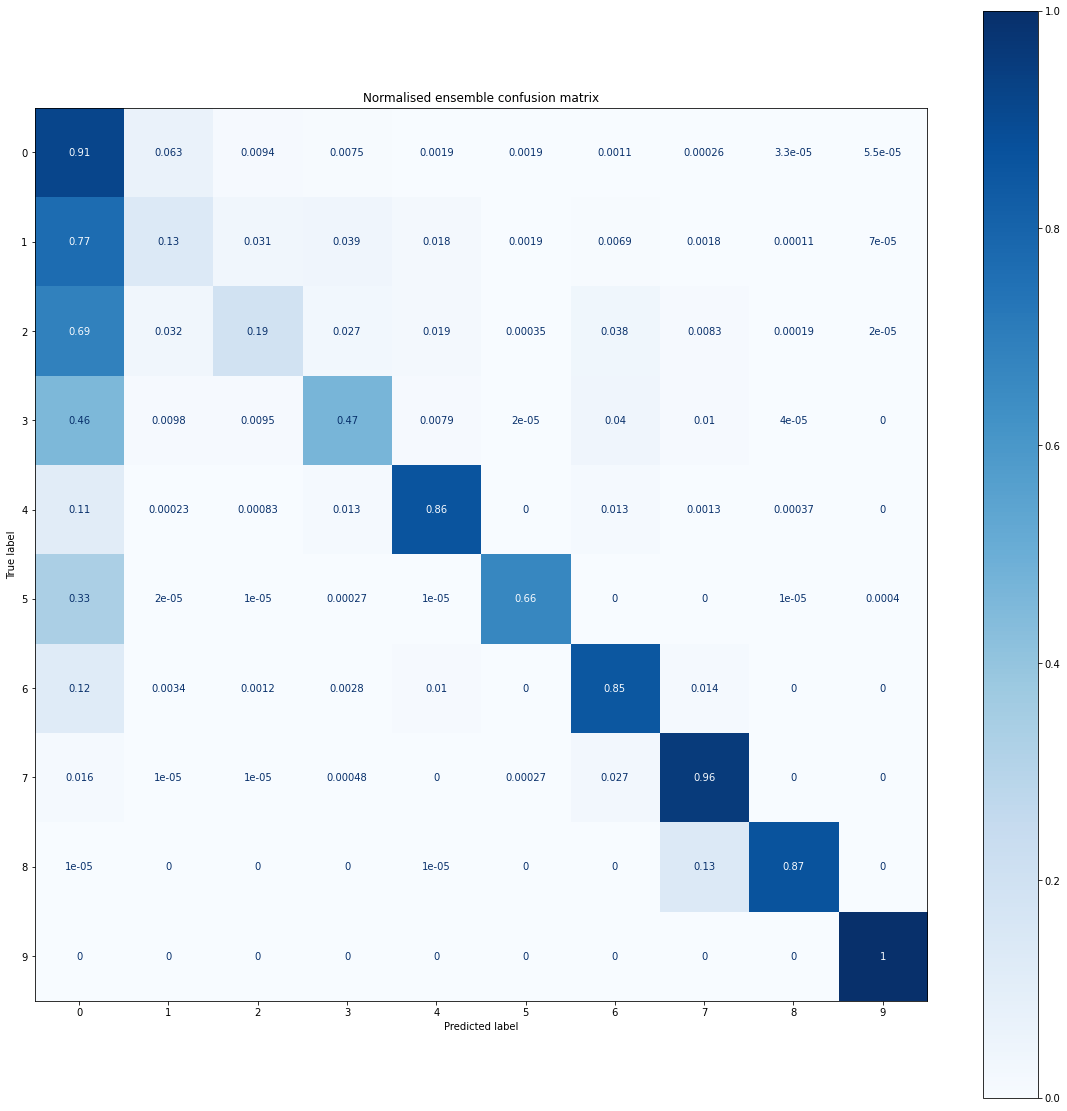

0.6893148917295986
12
              precision    recall  f1-score   support

           0       0.46      0.84      0.59     90877
           1       0.61      0.27      0.37    100242
           2       0.82      0.64      0.72    100242
           3       0.87      0.83      0.85    100242
           4       0.96      0.97      0.97    100242
           5       0.98      1.00      0.99    100242
           6       0.97      0.98      0.98    100242
           7       0.99      0.99      0.99    100242
           8       1.00      1.00      1.00    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.85    993054
   macro avg       0.86      0.85      0.84    993054
weighted avg       0.87      0.85      0.85    993054



Analysis
[[8.39277265e-01 1.02138055e-01 2.77628003e-02 1.45361313e-02
  3.42220804e-03 1.18511835e-02 8.03283559e-04 9.90349593e-05
  7.70271906e-05 3.30116531e-05]
 [5.28840207e-01 2.65816724e-01 9.56485306e-02 7.52

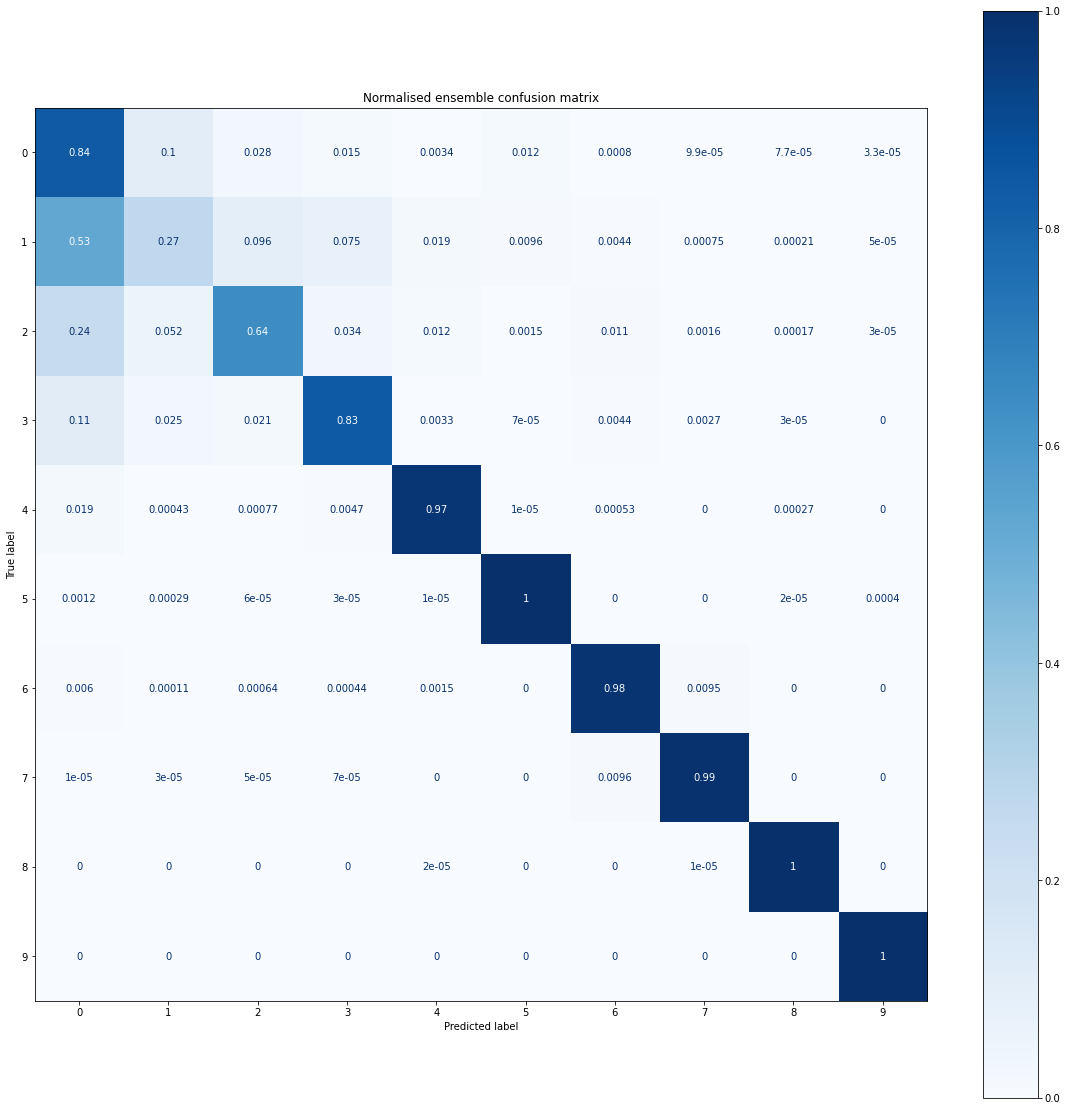

0.8449360646661994
13
              precision    recall  f1-score   support

           0       0.15      0.95      0.26     90877
           1       0.28      0.02      0.04    100242
           2       0.40      0.03      0.06    100242
           3       0.37      0.10      0.16    100242
           4       0.58      0.37      0.46    100242
           5       0.73      0.10      0.17    100242
           6       0.47      0.23      0.31    100242
           7       0.66      0.48      0.55    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.40    993054
   macro avg       0.56      0.41      0.39    993054
weighted avg       0.57      0.40      0.39    993054



Analysis
[[9.49954334e-01 1.15100631e-02 5.47993442e-03 1.76172189e-02
  4.17047218e-03 2.61892448e-03 8.15387832e-03 3.85135953e-04
  3.30116531e-05 7.70271906e-05]
 [8.87841424e-01 2.07797131e-02 1.09235650e-02 3.17

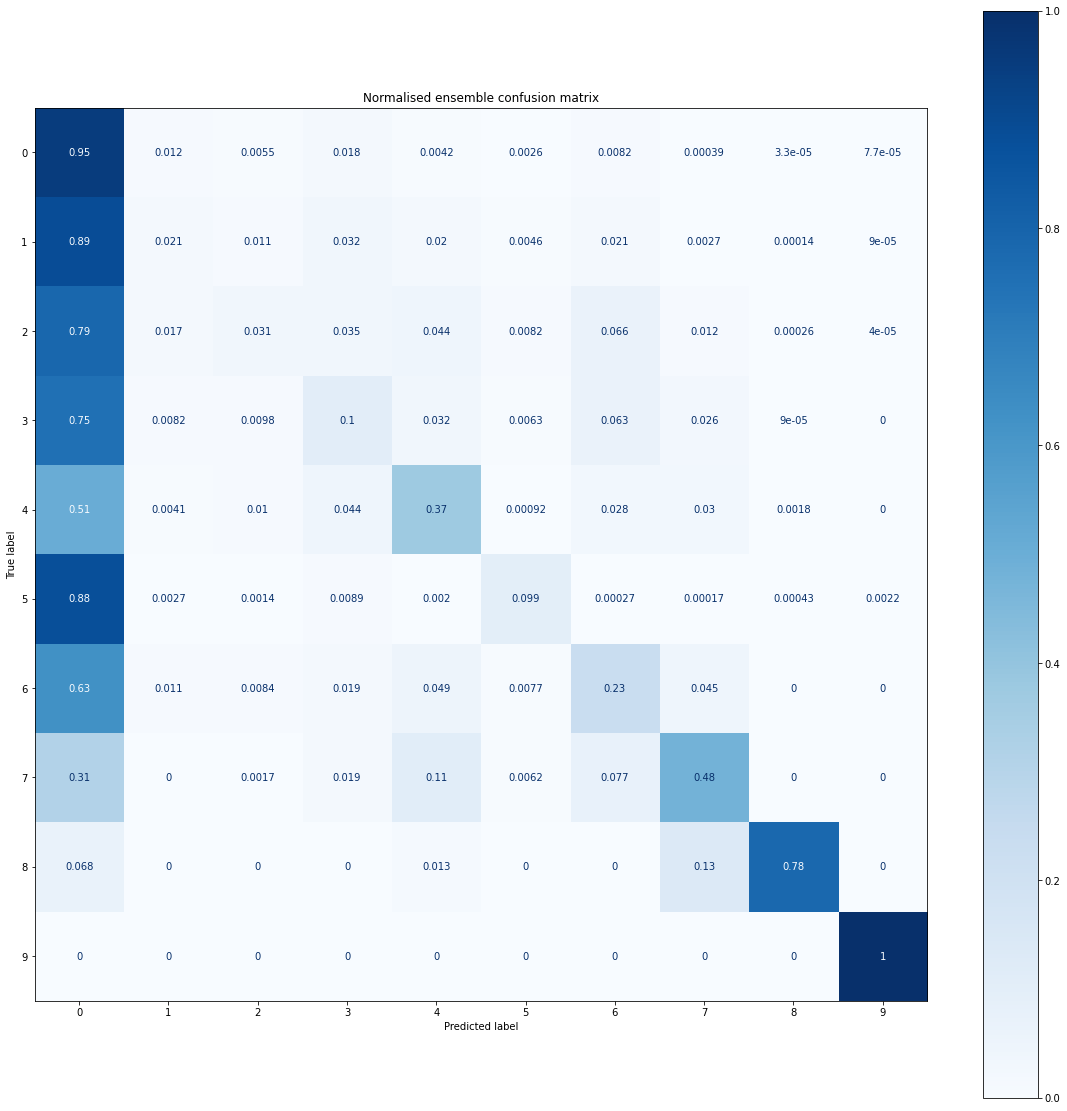

0.3890852692597364
14
              precision    recall  f1-score   support

           0       0.25      0.91      0.39     90877
           1       0.56      0.13      0.21    100242
           2       0.77      0.16      0.26    100242
           3       0.84      0.43      0.57    100242
           4       0.90      0.82      0.86    100242
           5       0.99      0.66      0.80    100242
           6       0.85      0.83      0.84    100242
           7       0.80      0.96      0.87    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.67    993054
   macro avg       0.80      0.68      0.67    993054
weighted avg       0.80      0.67      0.67    993054





In [0]:
# IF PREVIOUS CELL IS EXECUTED FULLY NO NEED TO EXECUTE THIS MINE STOPPED AFTER 9 searches 
# FOR ALREADY PRE FITTED CLASSIFIERS
# https://stackoverflow.com/questions/42920148/using-sklearn-voting-ensemble-with-partial-fit    
# https://sebastianraschka.com/Articles/2014_ensemble_classifier.html#ensembleclassifier---tuning-weights
# eclf = EnsembleVoteClassifier(
#                               clfs=[clf1, clf2, clf3, clf4],
#                               voting="soft",
#                               refit=False
                            
#                             )


# eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))



np.random.seed(123)

df1 = pd.DataFrame(columns=('w1', 'w2', 'w3','precision', 'recall', 'val_acc', 'f1'))

            # IT WAS FOUND THAT ON INCREASING W4 , F1 DECREASES, hence don't grid search w4 due to time constraint
counter = 0
i = 0
j = 0
for w1 in range(1,4):
    for w2 in range(1,4):
         for w3 in range(1,4):
            counter += 1
            if counter < 8:
              continue
            print(counter)
            # if len(set((w1,w2,w3))) == 1 and j==0: # calculate results for equal weights once and then skip if all weights are equal j used for it
            #     j = 1
            if len(set((w1,w2,w3))) == 1 and j==1:
                continue    

            eclf = EnsembleVoteClassifier(
                                      clfs=[clf1, clf2, clf3,clf4], 
                                      weights=[w1,w2,w3,1], 
                                      voting='hard', 
                                      refit=False
                                      )
            
            eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))#NOT fitting actually

            y_pred = eclf.predict(X_val)
     
            print(classification_report(y_val,y_pred))
            print("\n")
            fig, ax = plt.subplots(figsize=(20, 20))    
            disp = plot_confusion_matrix(eclf, 
                                         X_val, 
                                         y_val,
                                            ax = ax,
                                            cmap=plt.cm.Blues,
                                            normalize='true')
            disp.ax_.set_title('Normalised ensemble confusion matrix')

            print('Analysis')
            print(disp.confusion_matrix)
            plt.show()
            

            precision = precision_score(y_val,y_pred,average='micro')
            recall = recall_score(y_val,y_pred,average='micro')
            accuracy = accuracy_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred,average='macro')
            print(f1)
            df1.loc[i] = [w1, w2, w3,precision, recall , accuracy, f1]
            i += 1

df1.sort(columns=['f1', 'val_acc'], ascending=False)
# group / ensemble of models 

  
# Voting Classifier with hard voting 
  
# eclf = EnsembleVoteClassifier(
#         estimators=[('svm', clf1), ('lr', clf2), ('dt', clf3),('mlp', clf4)],
#         voting='hard',
#         refit = false,
#         )

# eclf.fit(X_train, y_train) 

15
              precision    recall  f1-score   support

           0       0.36      0.86      0.50     90877
           1       0.61      0.23      0.33    100242
           2       0.82      0.62      0.71    100242
           3       0.87      0.79      0.82    100242
           4       0.96      0.94      0.95    100242
           5       0.97      0.67      0.79    100242
           6       0.95      0.94      0.94    100242
           7       0.85      0.97      0.91    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.79    993054
   macro avg       0.84      0.79      0.79    993054
weighted avg       0.84      0.79      0.79    993054



Analysis
[[8.63001640e-01 8.07024880e-02 2.61122176e-02 1.40079448e-02
  3.29016143e-03 1.10038844e-02 1.39749332e-03 3.30116531e-04
  7.70271906e-05 7.70271906e-05]
 [5.77931406e-01 2.25334690e-01 9.06805531e-02 7.05492708e-02
  1.8225

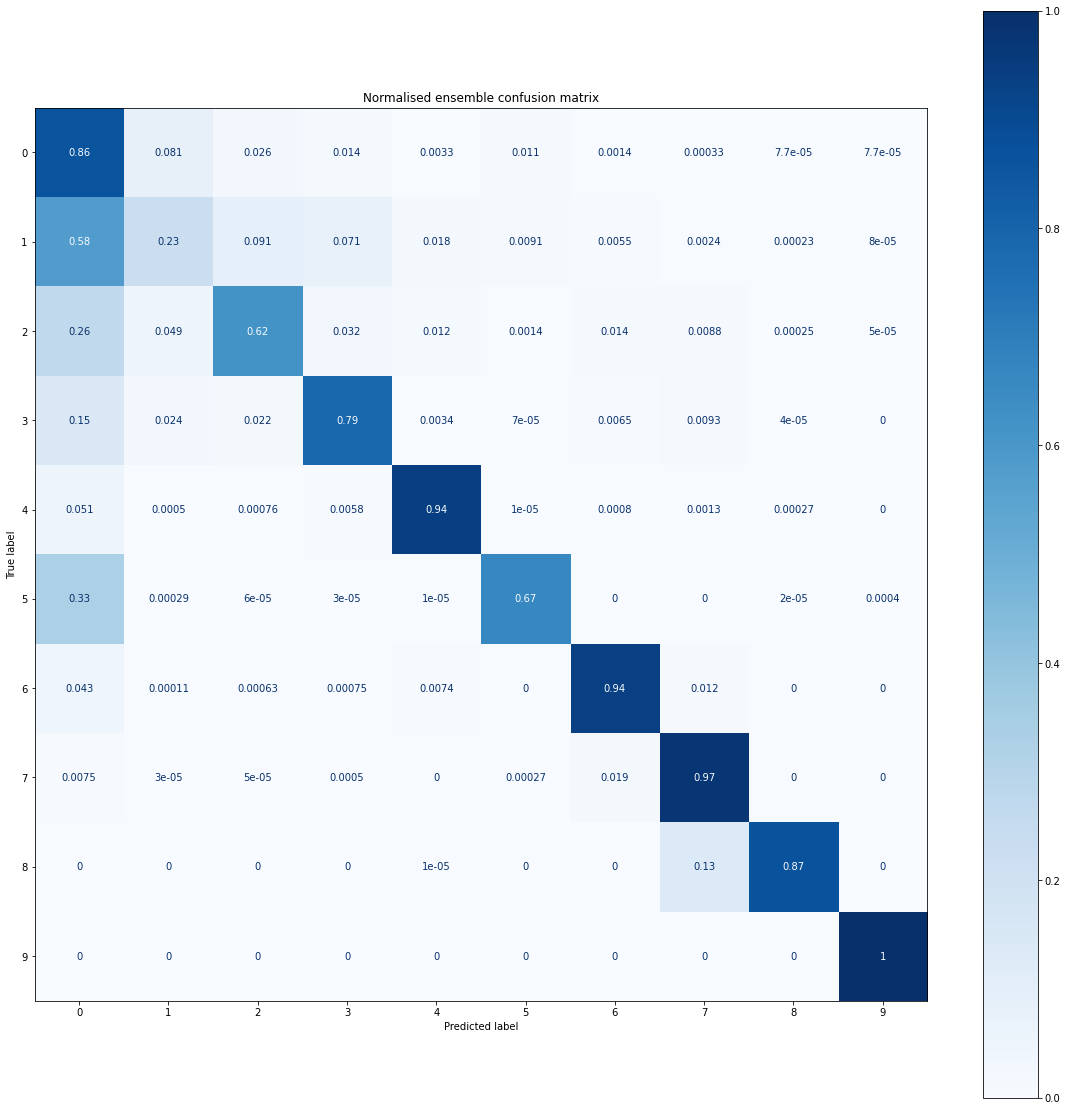

0.7879413041745289
16
              precision    recall  f1-score   support

           0       0.30      0.83      0.44     90877
           1       0.23      0.01      0.02    100242
           2       0.24      0.03      0.05    100242
           3       0.50      0.06      0.11    100242
           4       0.28      0.21      0.24    100242
           5       0.15      0.10      0.12    100242
           6       0.55      0.20      0.30    100242
           7       0.27      0.48      0.34    100242
           8       0.37      0.78      0.50    100241
           9       0.70      1.00      0.82    100242

    accuracy                           0.37    993054
   macro avg       0.36      0.37      0.29    993054
weighted avg       0.36      0.37      0.29    993054



Analysis
[[8.25225305e-01 8.27492105e-03 7.73573071e-03 3.73031680e-03
  2.30641416e-02 2.13255279e-02 7.95580840e-03 4.52919881e-02
  3.47612707e-02 2.26349902e-02]
 [5.90780312e-01 1.17415854e-02 1.39462501e-02 1.33

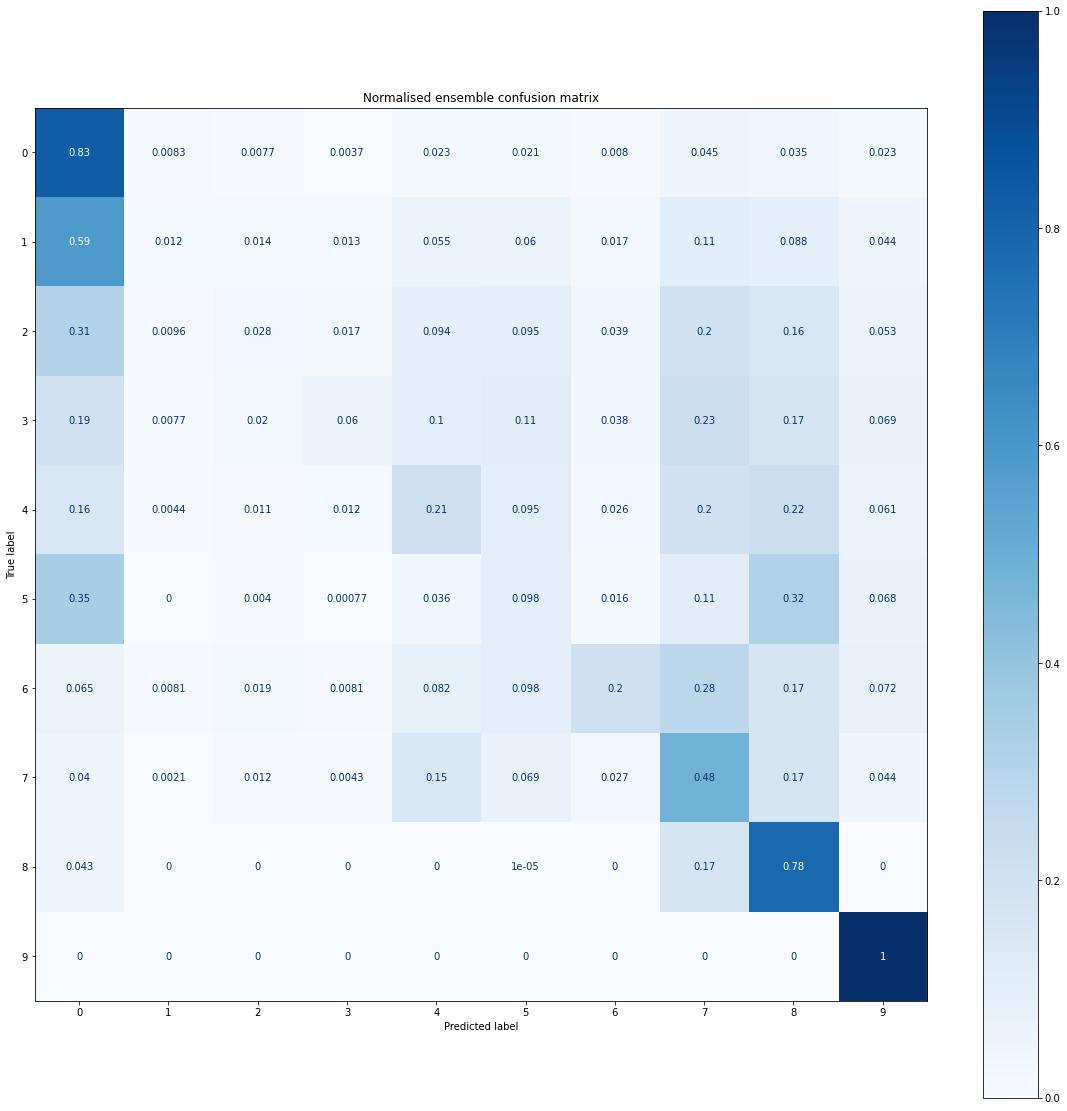

0.29438059131356803
17
              precision    recall  f1-score   support

           0       0.31      0.86      0.45     90877
           1       0.53      0.10      0.17    100242
           2       0.51      0.09      0.16    100242
           3       0.82      0.38      0.51    100242
           4       0.59      0.69      0.64    100242
           5       0.62      0.61      0.62    100242
           6       0.83      0.65      0.73    100242
           7       0.51      0.69      0.58    100242
           8       0.69      0.78      0.73    100241
           9       0.87      1.00      0.93    100242

    accuracy                           0.58    993054
   macro avg       0.63      0.58      0.55    993054
weighted avg       0.63      0.58      0.55    993054



Analysis
[[8.56300274e-01 4.82850446e-02 7.72472683e-03 4.51159259e-03
  1.29625758e-02 1.20932689e-02 4.67665086e-03 2.23488892e-02
  2.08413570e-02 1.02556202e-02]
 [5.98531554e-01 9.98184394e-02 1.97122962e-02 3.0

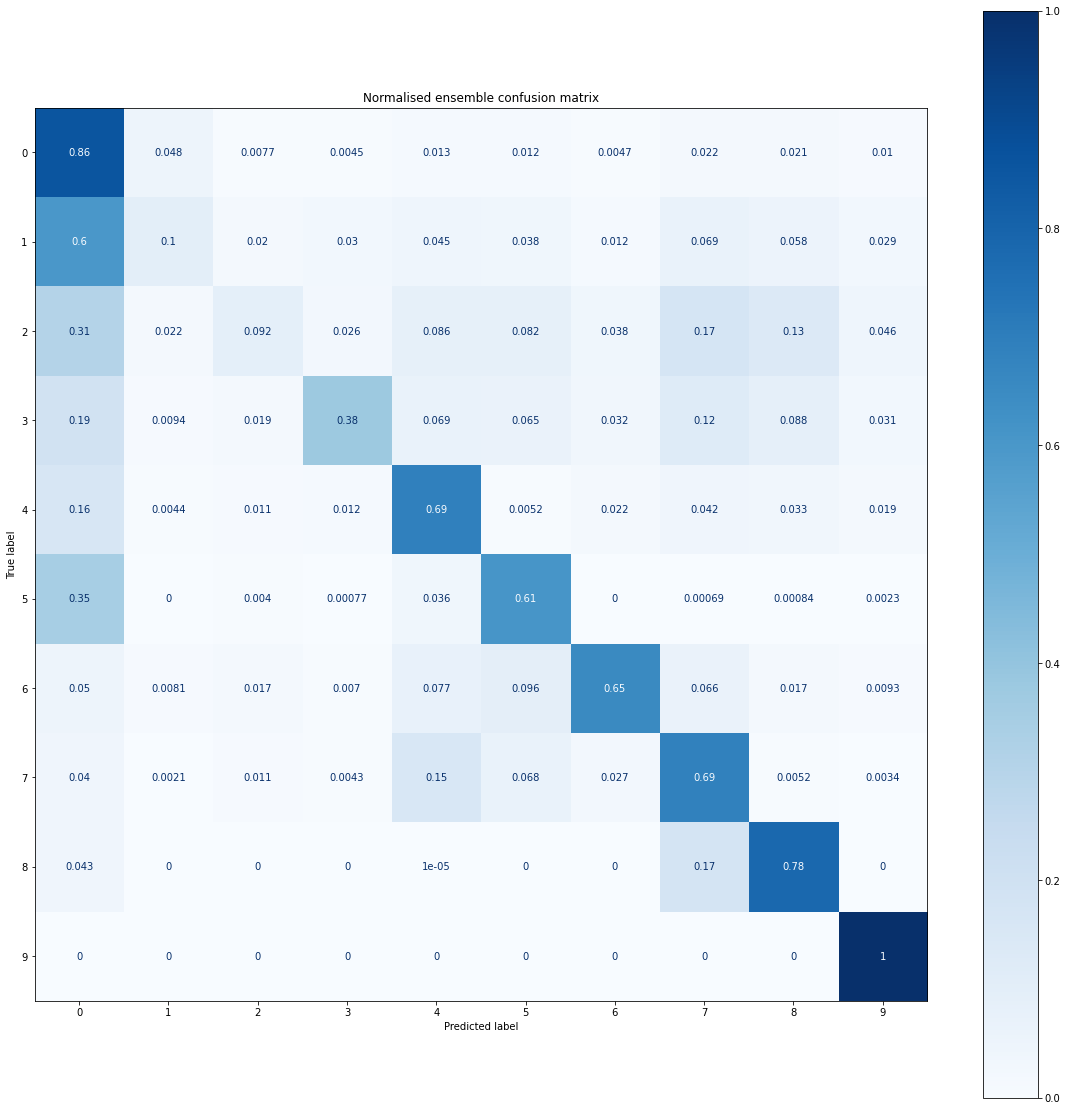

0.5524150970191444
18
              precision    recall  f1-score   support

           0       0.34      0.87      0.49     90877
           1       0.59      0.21      0.31    100242
           2       0.80      0.56      0.66    100242
           3       0.86      0.72      0.78    100242
           4       0.90      0.89      0.90    100242
           5       0.95      0.67      0.78    100242
           6       0.94      0.88      0.91    100242
           7       0.80      0.97      0.87    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.76    993054
   macro avg       0.82      0.76      0.76    993054
weighted avg       0.82      0.76      0.77    993054



Analysis
[[8.66346820e-01 7.79955324e-02 2.58371205e-02 1.32046612e-02
  5.00676739e-03 9.28727841e-03 1.80463704e-03 3.85135953e-04
  3.30116531e-05 9.90349593e-05]
 [5.98990443e-01 2.10879671e-01 8.33682488e-02 6.53

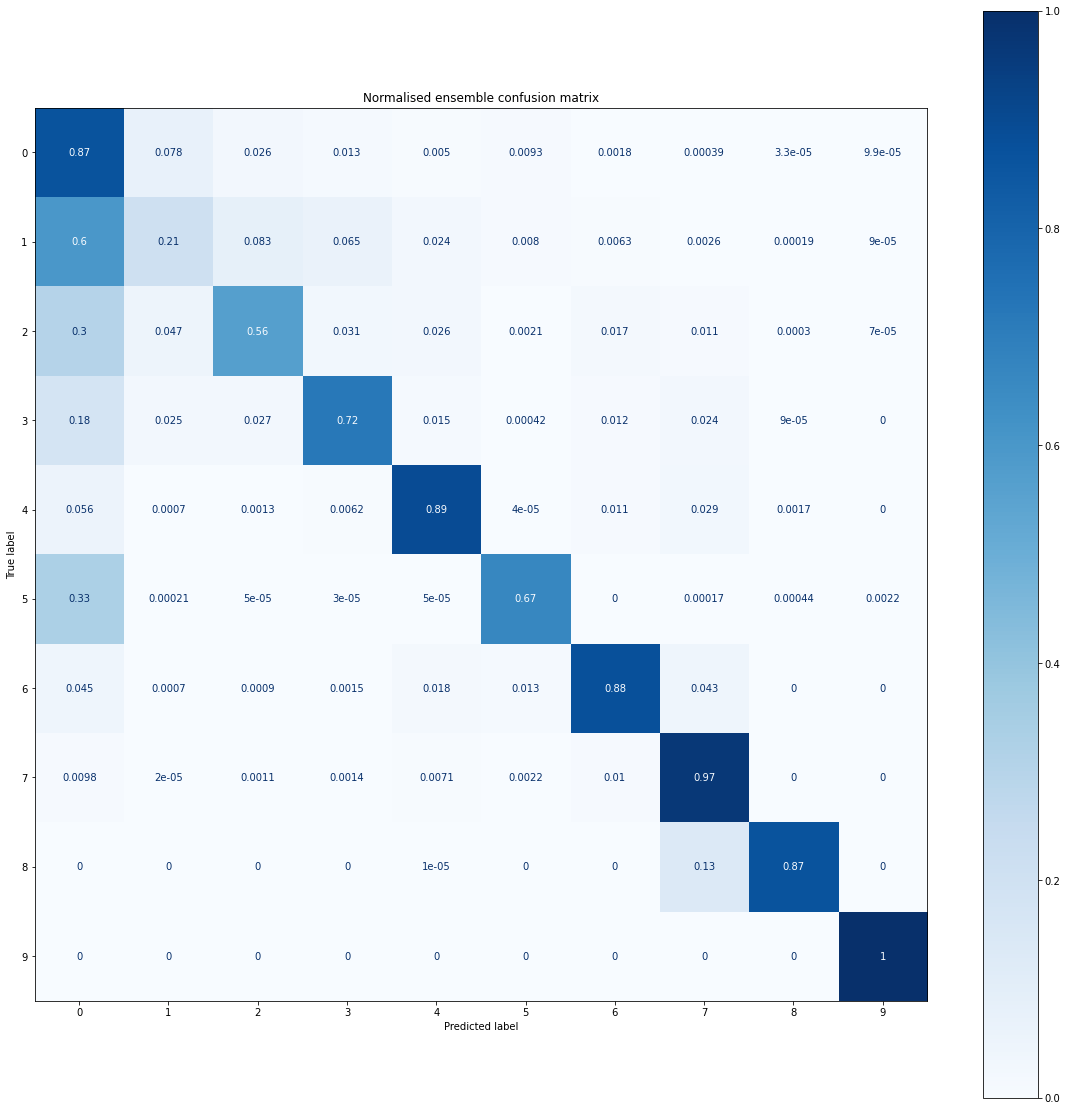

0.7637156269074599
19
              precision    recall  f1-score   support

           0       0.14      0.90      0.24     90877
           1       0.20      0.01      0.02    100242
           2       0.17      0.01      0.02    100242
           3       0.18      0.06      0.09    100242
           4       0.45      0.16      0.24    100242
           5       0.90      0.08      0.14    100242
           6       0.20      0.22      0.21    100242
           7       0.28      0.12      0.17    100242
           8       1.00      0.57      0.72    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.31    993054
   macro avg       0.45      0.31      0.28    993054
weighted avg       0.45      0.31      0.29    993054



Analysis
[[9.00832994e-01 1.10589038e-02 7.64769964e-03 4.98475962e-02
  1.05637290e-03 2.81699440e-03 2.59361555e-02 7.37260253e-04
  0.00000000e+00 6.60233062e-05]
 [8.49085214e-01 1.15420682e-02 9.61672752e-03 5.51

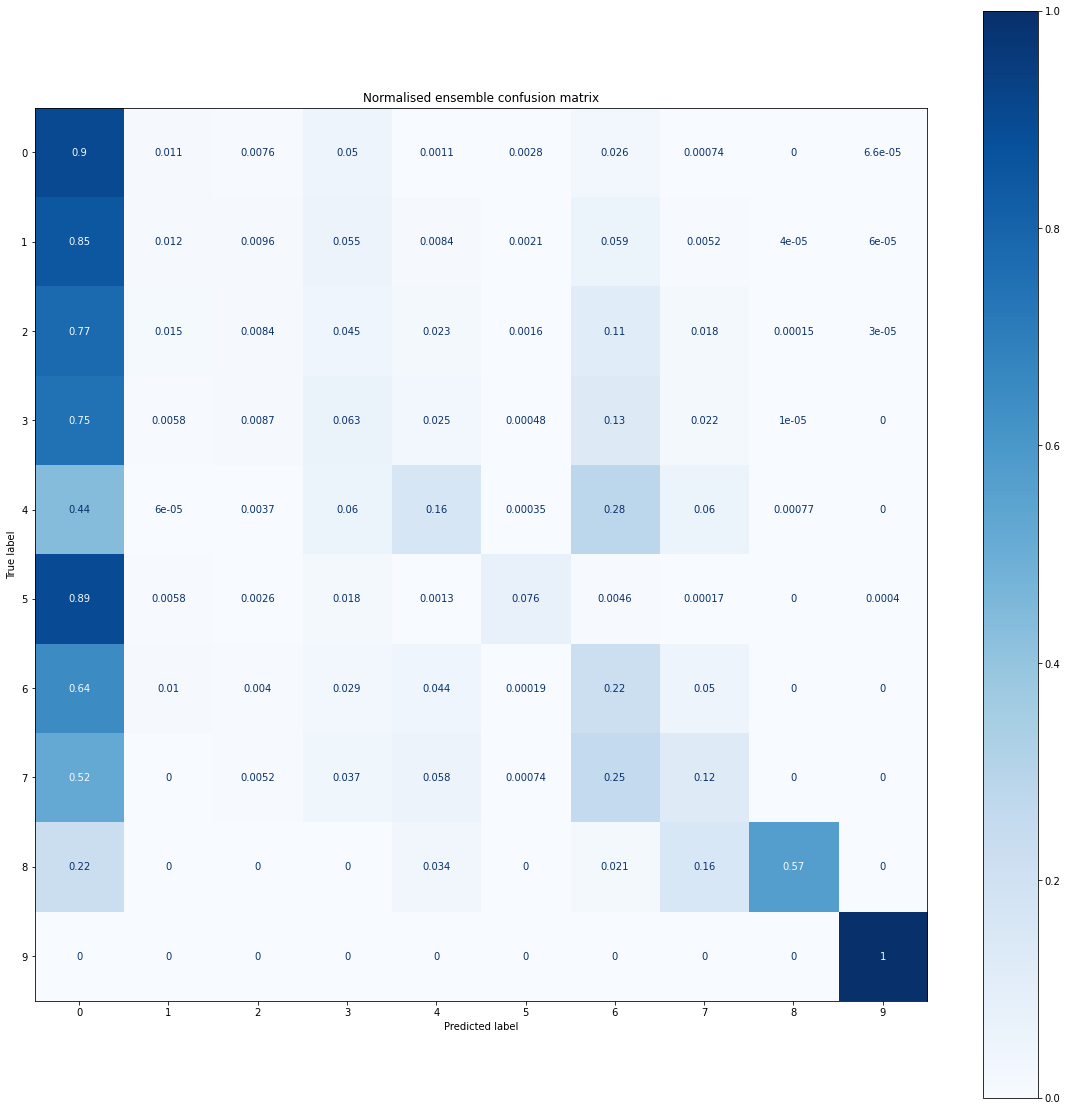

0.2847823606528378
20


In [0]:
# IF PREVIOUS CELL IS EXECUTED FULLY NO NEED TO EXECUTE THIS MINE STOPPED AFTER 9 searches 
# FOR ALREADY PRE FITTED CLASSIFIERS
# https://stackoverflow.com/questions/42920148/using-sklearn-voting-ensemble-with-partial-fit    
# https://sebastianraschka.com/Articles/2014_ensemble_classifier.html#ensembleclassifier---tuning-weights
# eclf = EnsembleVoteClassifier(
#                               clfs=[clf1, clf2, clf3, clf4],
#                               voting="soft",
#                               refit=False
                            
#                             )


# eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))



np.random.seed(123)

df1 = pd.DataFrame(columns=('w1', 'w2', 'w3','precision', 'recall', 'val_acc', 'f1'))

            # IT WAS FOUND THAT ON INCREASING W4 , F1 DECREASES, hence don't grid search w4 due to time constraint
counter = 0
i = 0
j = 0
for w1 in range(1,4):
    for w2 in range(1,4):
         for w3 in range(1,4):
            counter += 1
            if counter < 15:
              continue
            print(counter)
            # if len(set((w1,w2,w3))) == 1 and j==0: # calculate results for equal weights once and then skip if all weights are equal j used for it
            #     j = 1
            if len(set((w1,w2,w3))) == 1 and j==1:
                continue    

            eclf = EnsembleVoteClassifier(
                                      clfs=[clf1, clf2, clf3,clf4], 
                                      weights=[w1,w2,w3,1], 
                                      voting='hard', 
                                      refit=False
                                      )
            
            eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))#NOT fitting actually

            y_pred = eclf.predict(X_val)
     
            print(classification_report(y_val,y_pred))
            print("\n")
            fig, ax = plt.subplots(figsize=(20, 20))    
            disp = plot_confusion_matrix(eclf, 
                                         X_val, 
                                         y_val,
                                            ax = ax,
                                            cmap=plt.cm.Blues,
                                            normalize='true')
            disp.ax_.set_title('Normalised ensemble confusion matrix')

            print('Analysis')
            print(disp.confusion_matrix)
            plt.show()
            

            precision = precision_score(y_val,y_pred,average='micro')
            recall = recall_score(y_val,y_pred,average='micro')
            accuracy = accuracy_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred,average='macro')
            print(f1)
            df1.loc[i] = [w1, w2, w3,precision, recall , accuracy, f1]
            i += 1

df1.sort(columns=['f1', 'val_acc'], ascending=False)
# group / ensemble of models 

  
# Voting Classifier with hard voting 
  
# eclf = EnsembleVoteClassifier(
#         estimators=[('svm', clf1), ('lr', clf2), ('dt', clf3),('mlp', clf4)],
#         voting='hard',
#         refit = false,
#         )

# eclf.fit(X_train, y_train) 

20
              precision    recall  f1-score   support

           0       0.16      0.94      0.27     90877
           1       0.33      0.03      0.05    100242
           2       0.41      0.02      0.04    100242
           3       0.33      0.11      0.17    100242
           4       0.76      0.47      0.58    100242
           5       0.95      0.10      0.19    100242
           6       0.34      0.25      0.29    100242
           7       0.64      0.47      0.54    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.41    993054
   macro avg       0.59      0.42      0.40    993054
weighted avg       0.60      0.41      0.40    993054



Analysis
[[9.37574964e-01 1.55815003e-02 4.22549160e-03 2.40214796e-02
  1.15540786e-03 1.38648943e-03 1.54054381e-02 5.83205872e-04
  0.00000000e+00 6.60233062e-05]
 [8.60756968e-01 2.67053730e-02 9.57682409e-03 4.11204884e-02
  1.2390

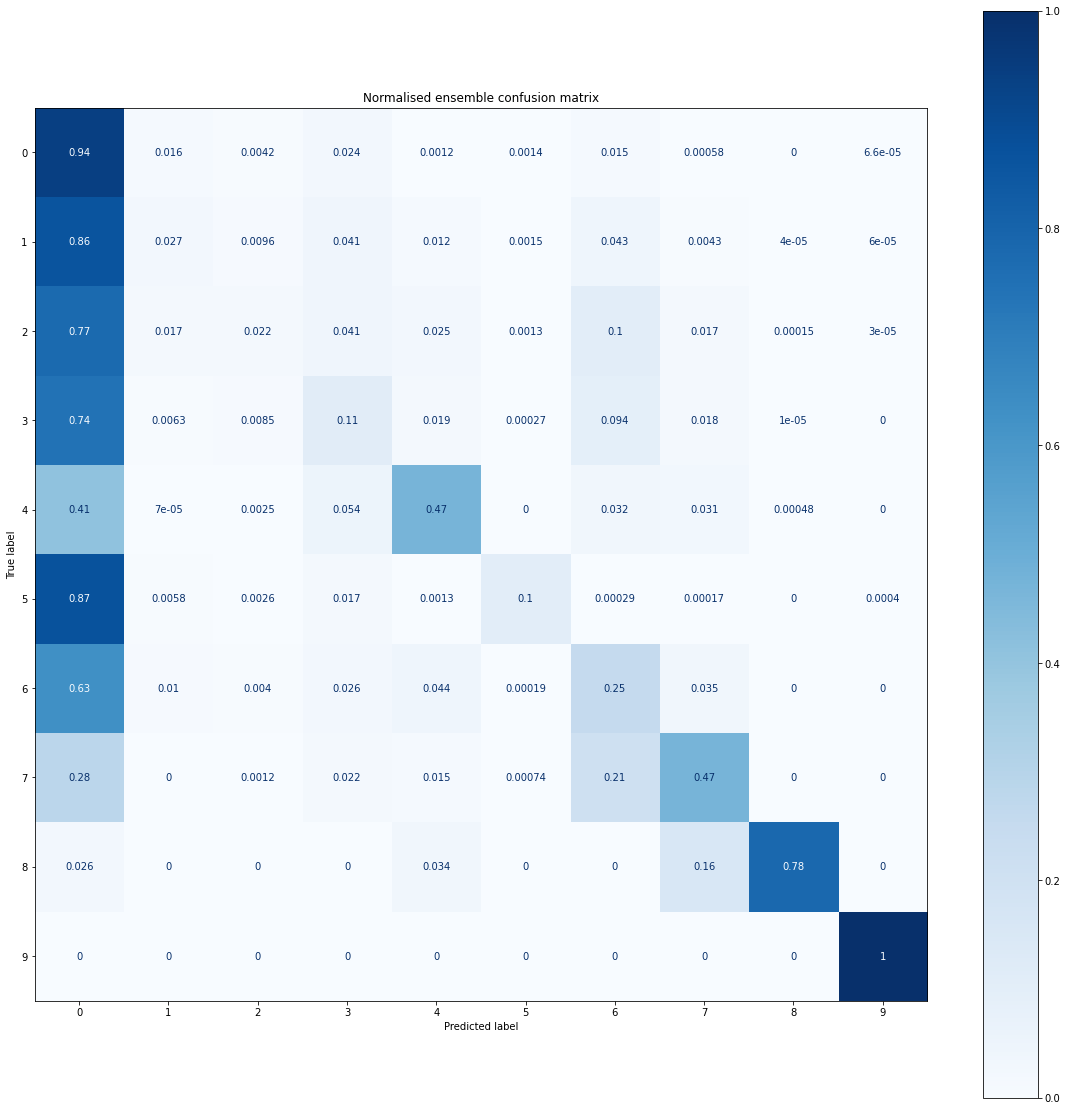

0.3999993542308756
21
              precision    recall  f1-score   support

           0       0.25      0.91      0.39     90877
           1       0.57      0.14      0.22    100242
           2       0.78      0.19      0.31    100242
           3       0.84      0.47      0.60    100242
           4       0.94      0.86      0.90    100242
           5       0.99      0.66      0.80    100242
           6       0.87      0.85      0.86    100242
           7       0.85      0.96      0.90    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.69    993054
   macro avg       0.81      0.69      0.69    993054
weighted avg       0.81      0.69      0.69    993054



Analysis
[[9.09294981e-01 6.72997568e-02 1.00575503e-02 8.03283559e-03
  1.90367200e-03 1.98069919e-03 1.07838067e-03 2.64093225e-04
  3.30116531e-05 5.50194219e-05]
 [7.58913430e-01 1.39572235e-01 3.26210570e-02 3.99

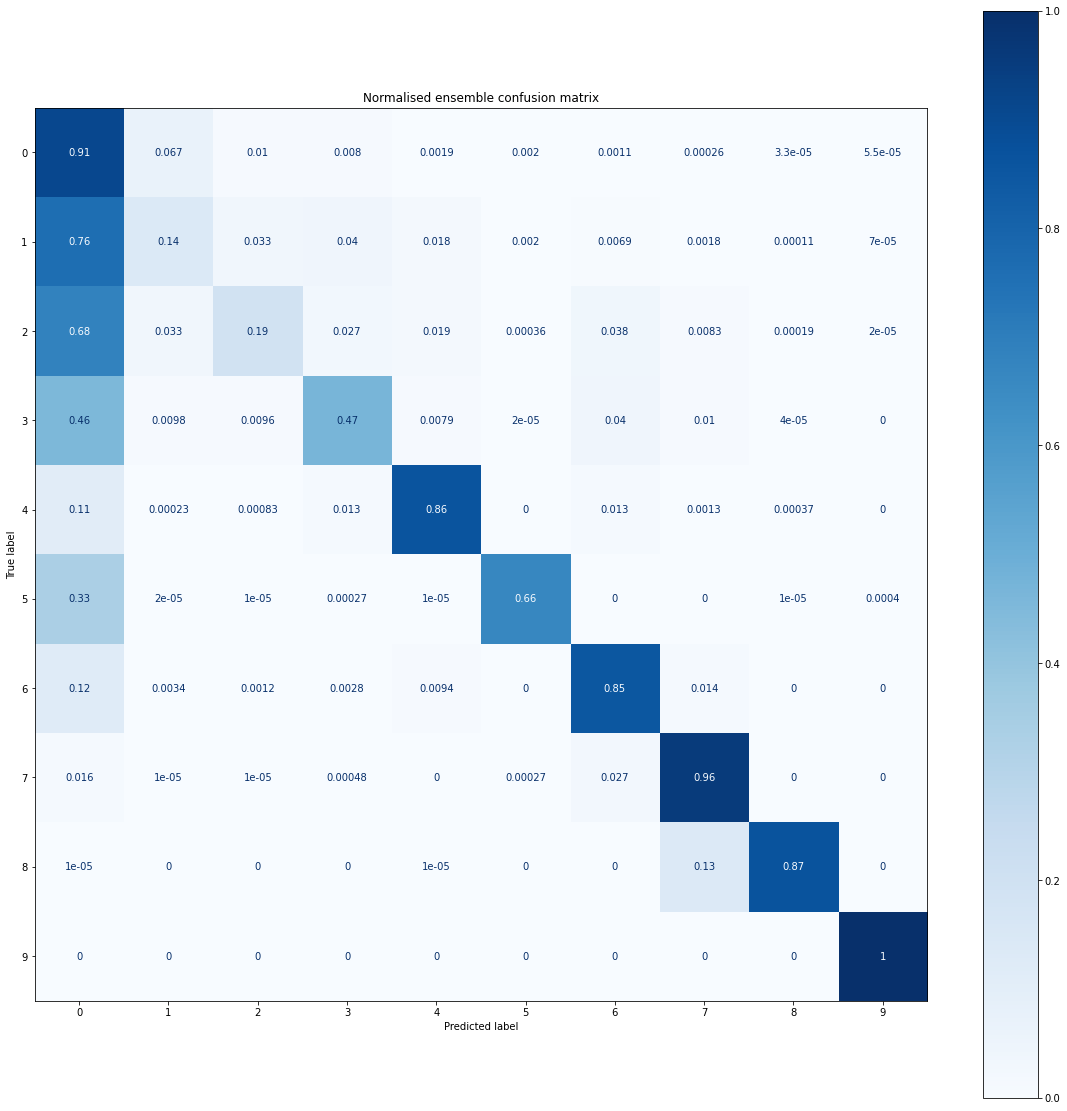

0.6901898983151777
22
              precision    recall  f1-score   support

           0       0.15      0.91      0.26     90877
           1       0.21      0.01      0.02    100242
           2       0.27      0.01      0.02    100242
           3       0.22      0.07      0.10    100242
           4       0.53      0.20      0.29    100242
           5       0.93      0.10      0.18    100242
           6       0.23      0.24      0.23    100242
           7       0.60      0.47      0.53    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.37    993054
   macro avg       0.51      0.38      0.35    993054
weighted avg       0.52      0.37      0.35    993054



Analysis
[[9.14147694e-01 1.18181718e-02 6.93244715e-03 4.20128305e-02
  1.50753216e-03 2.22278464e-03 2.06102754e-02 6.82240831e-04
  0.00000000e+00 6.60233062e-05]
 [8.59988827e-01 1.26992678e-02 9.47706550e-03 4.86

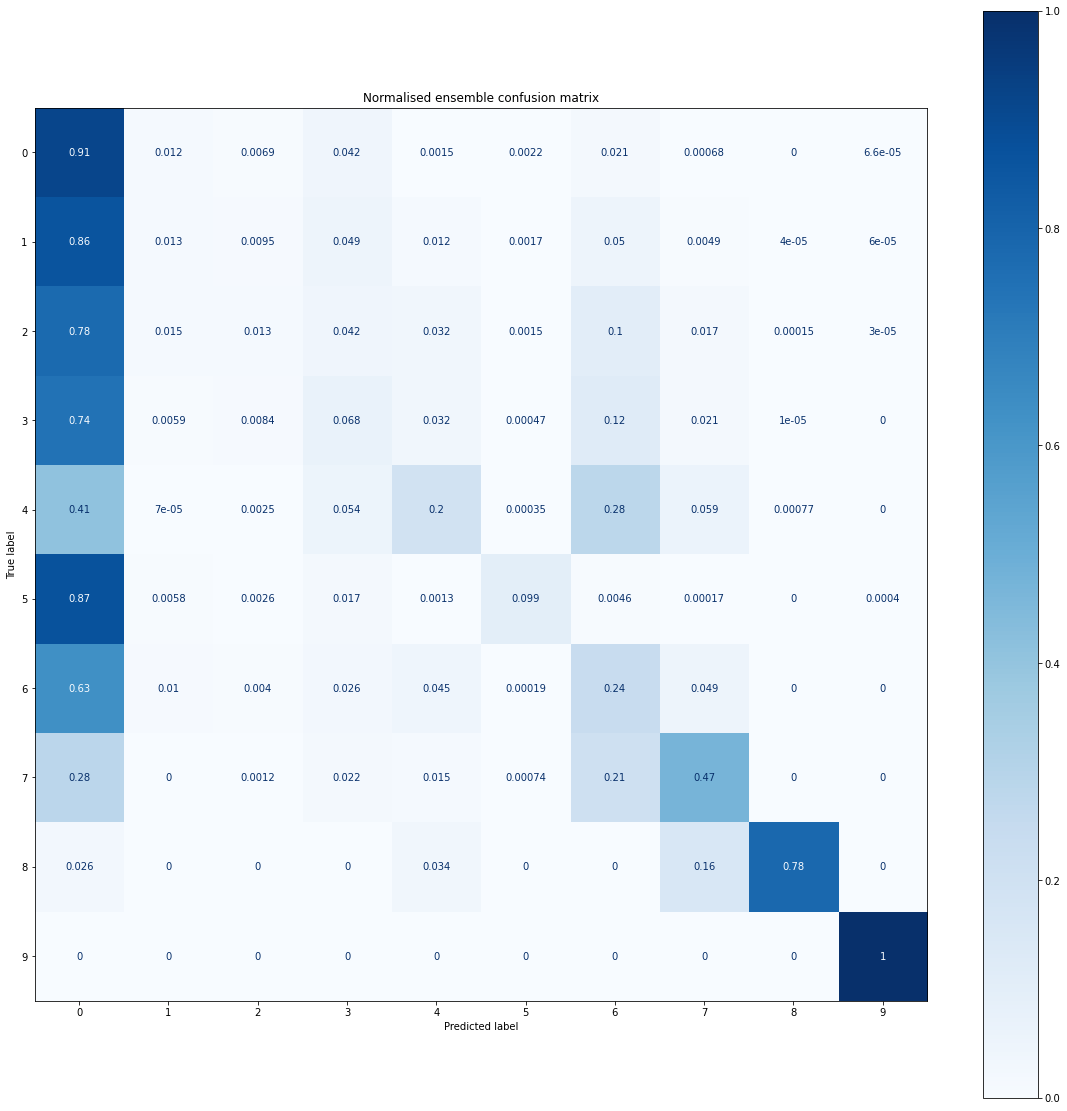

0.35172618009624224
23
              precision    recall  f1-score   support

           0       0.16      0.94      0.27     90877
           1       0.34      0.03      0.05    100242
           2       0.51      0.03      0.06    100242
           3       0.36      0.12      0.18    100242
           4       0.75      0.48      0.59    100242
           5       0.94      0.10      0.19    100242
           6       0.35      0.25      0.29    100242
           7       0.65      0.48      0.55    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.42    993054
   macro avg       0.60      0.42      0.41    993054
weighted avg       0.61      0.42      0.41    993054



Analysis
[[9.42559724e-01 1.52623876e-02 4.25850325e-03 2.02581511e-02
  1.58455935e-03 1.94768753e-03 1.34247389e-02 5.94209756e-04
  3.30116531e-05 7.70271906e-05]
 [8.65076515e-01 2.71243591e-02 1.03250135e-02 3.6

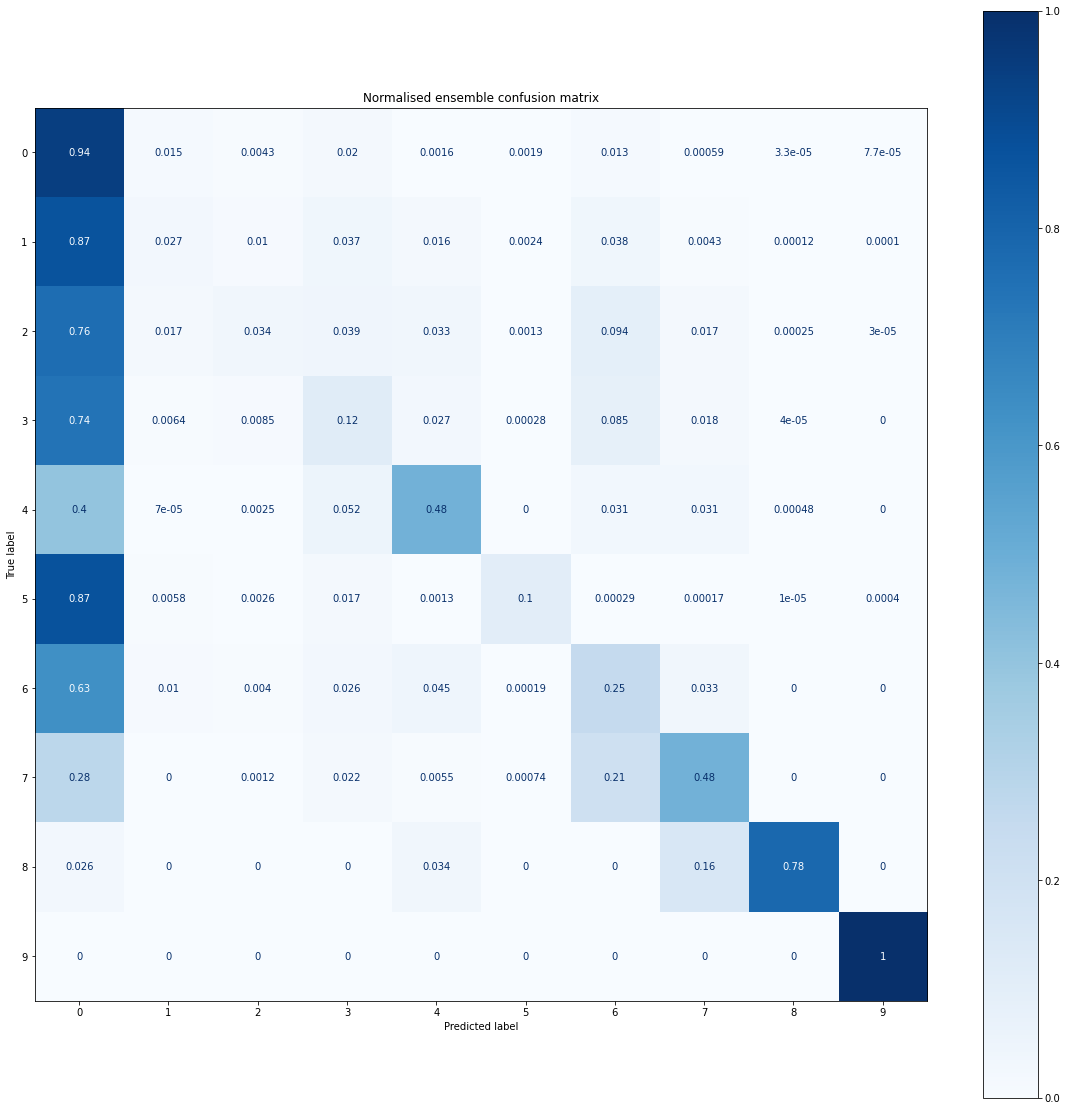

0.40576237892081224
24
              precision    recall  f1-score   support

           0       0.25      0.91      0.39     90877
           1       0.57      0.14      0.22    100242
           2       0.78      0.19      0.31    100242
           3       0.84      0.46      0.60    100242
           4       0.94      0.83      0.88    100242
           5       0.99      0.66      0.80    100242
           6       0.86      0.83      0.84    100242
           7       0.81      0.96      0.88    100242
           8       1.00      0.87      0.93    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.68    993054
   macro avg       0.80      0.68      0.68    993054
weighted avg       0.81      0.68      0.69    993054



Analysis
[[9.11792863e-01 6.37565060e-02 1.00355425e-02 7.63669575e-03
  1.84865257e-03 3.14711093e-03 1.34247389e-03 3.08108762e-04
  3.30116531e-05 9.90349593e-05]
 [7.63153169e-01 1.35113026e-01 3.22319986e-02 3.9

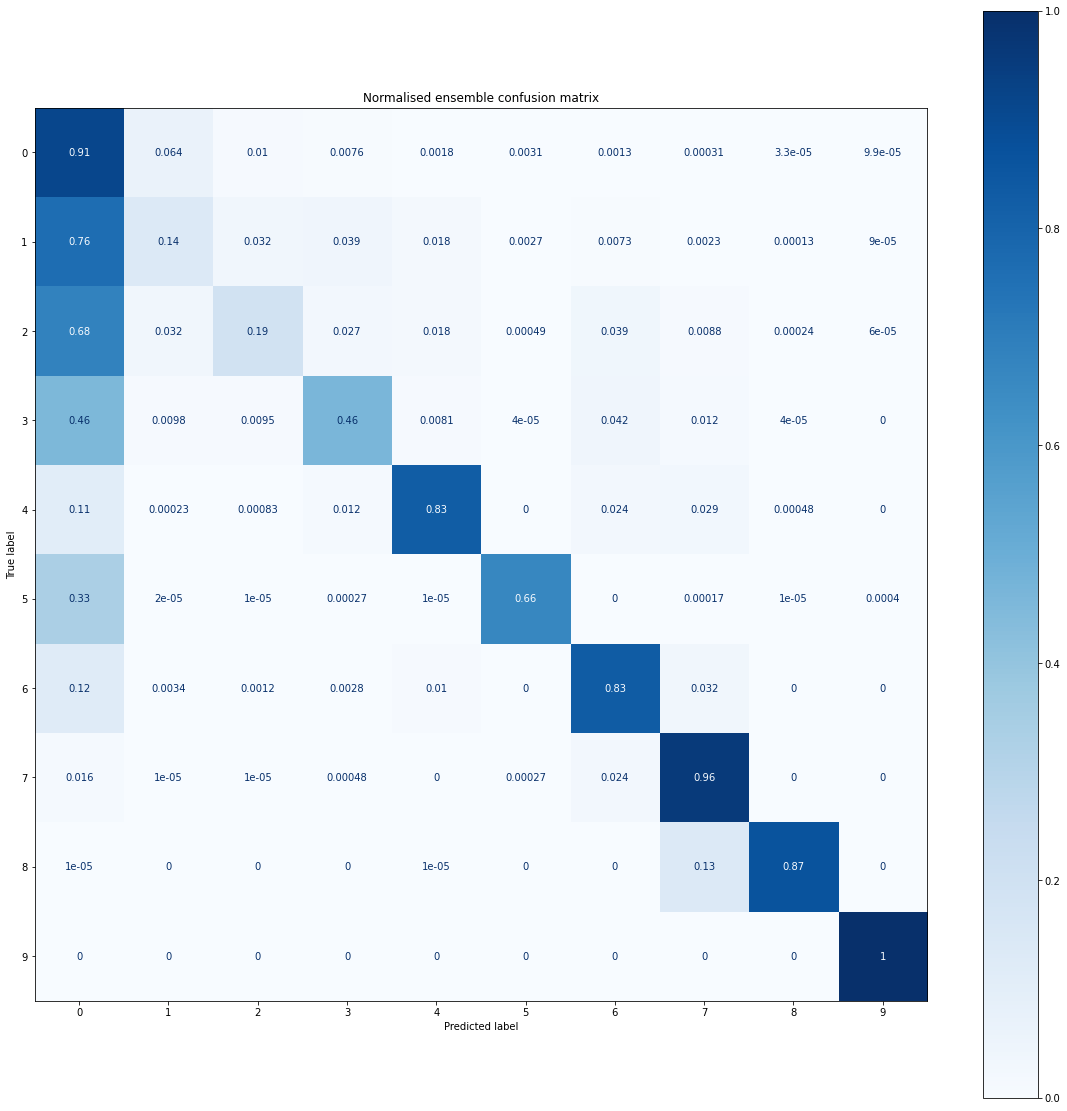

0.6839275979219288
25
              precision    recall  f1-score   support

           0       0.15      0.92      0.25     90877
           1       0.20      0.01      0.02    100242
           2       0.32      0.02      0.05    100242
           3       0.26      0.07      0.11    100242
           4       0.42      0.21      0.28    100242
           5       0.60      0.10      0.17    100242
           6       0.35      0.23      0.28    100242
           7       0.64      0.48      0.55    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.38    993054
   macro avg       0.49      0.38      0.36    993054
weighted avg       0.50      0.38      0.36    993054



Analysis
[[9.21025122e-01 1.14990592e-02 9.99152701e-03 3.59276825e-02
  5.32588004e-03 4.10444887e-03 1.15980941e-02 4.18147606e-04
  3.30116531e-05 7.70271906e-05]
 [8.79890665e-01 1.33277469e-02 1.22403783e-02 3.96

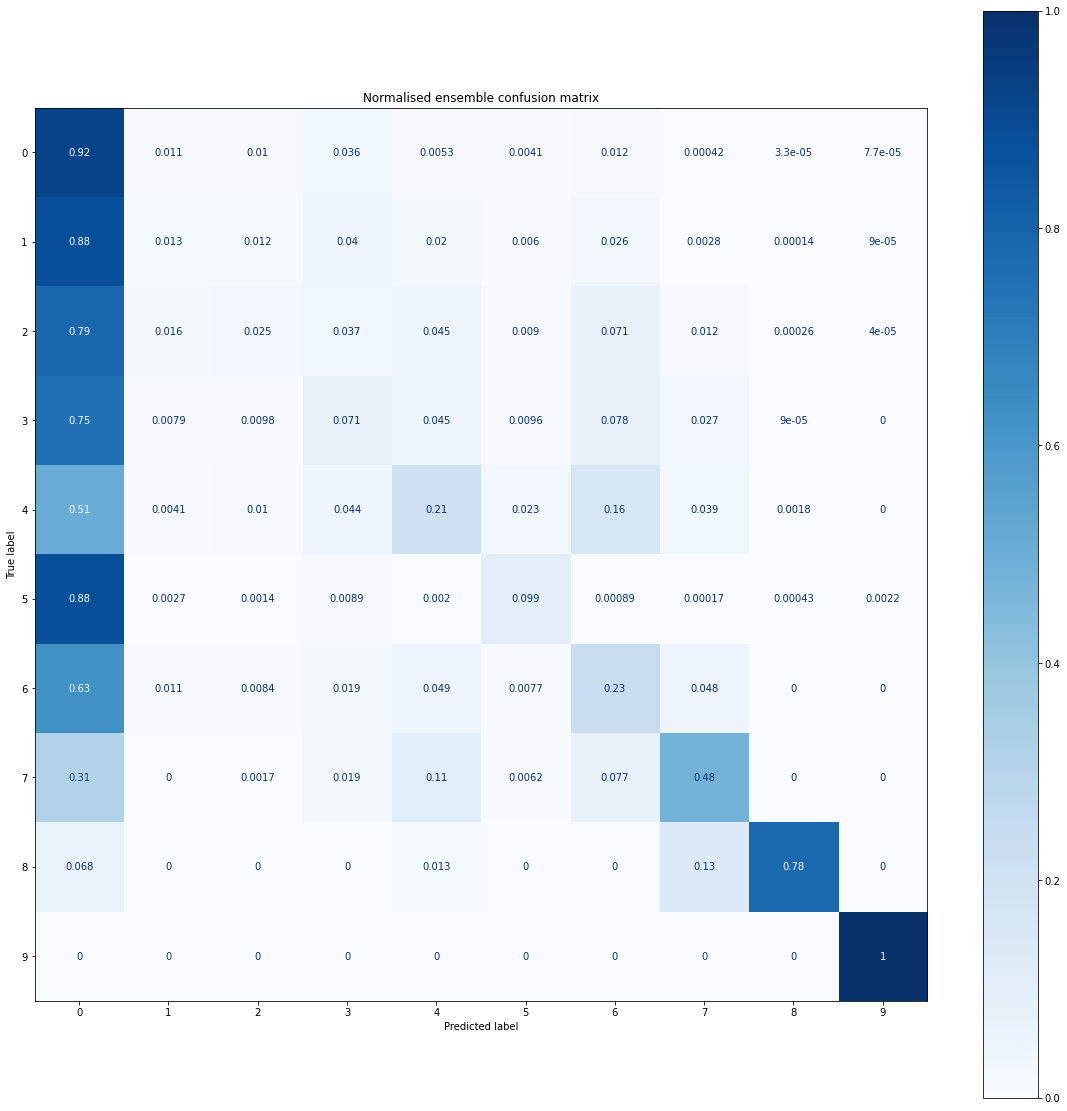

0.3591895489503134
26
              precision    recall  f1-score   support

           0       0.15      0.95      0.26     90877
           1       0.29      0.02      0.04    100242
           2       0.42      0.04      0.07    100242
           3       0.37      0.10      0.16    100242
           4       0.59      0.38      0.46    100242
           5       0.72      0.10      0.17    100242
           6       0.48      0.24      0.32    100242
           7       0.66      0.48      0.56    100242
           8       1.00      0.78      0.88    100241
           9       1.00      1.00      1.00    100242

    accuracy                           0.40    993054
   macro avg       0.57      0.41      0.39    993054
weighted avg       0.57      0.40      0.39    993054



Analysis
[[9.46146990e-01 1.29735797e-02 6.17317913e-03 1.78923160e-02
  4.18147606e-03 3.96139837e-03 8.15387832e-03 3.85135953e-04
  3.30116531e-05 9.90349593e-05]
 [8.83771274e-01 2.24756090e-02 1.20707887e-02 3.20

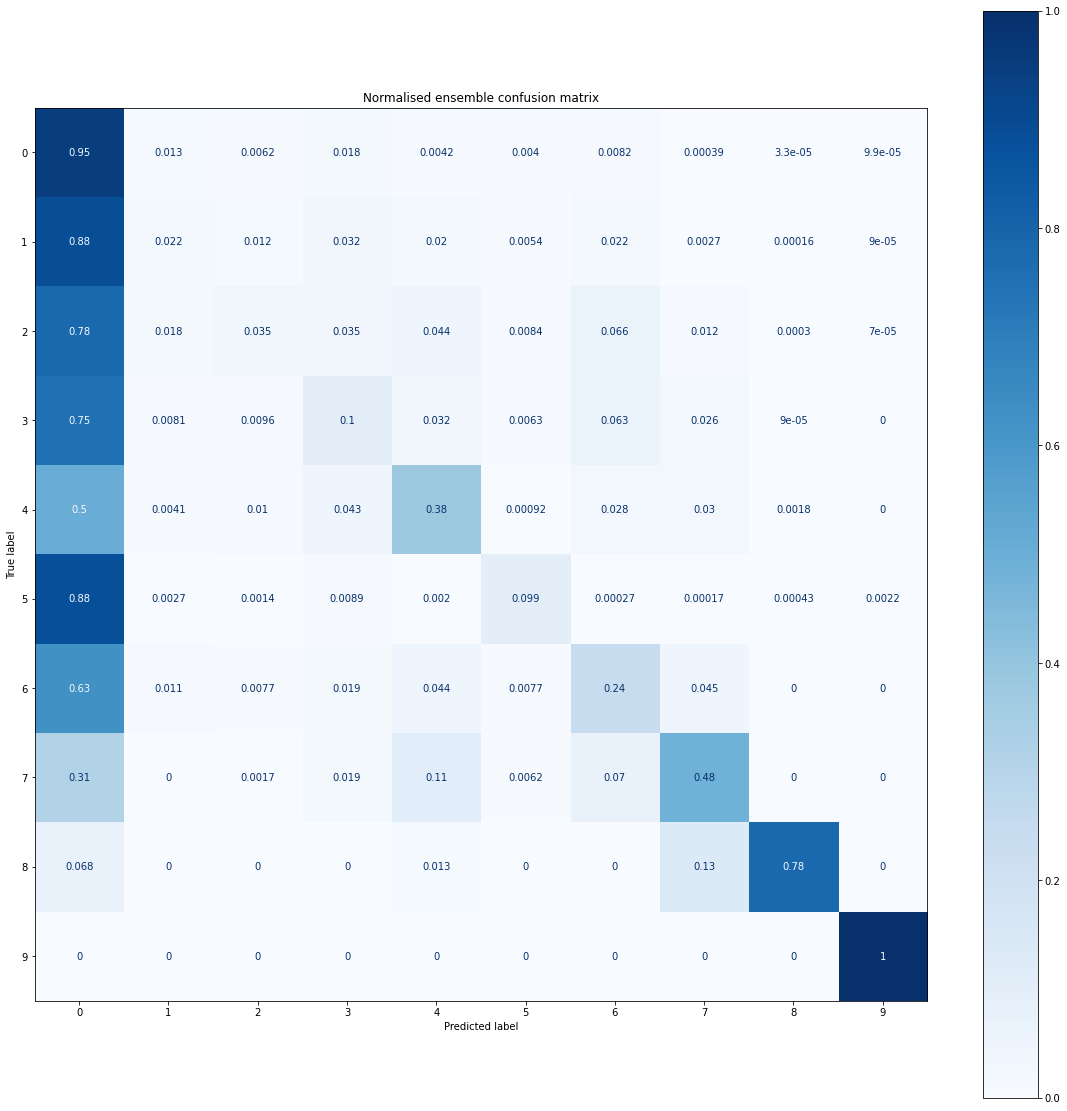

0.3919916502602674
27


In [0]:
# IF PREVIOUS CELL IS EXECUTED FULLY NO NEED TO EXECUTE THIS MINE STOPPED AFTER 9 searches 
# FOR ALREADY PRE FITTED CLASSIFIERS
# https://stackoverflow.com/questions/42920148/using-sklearn-voting-ensemble-with-partial-fit    
# https://sebastianraschka.com/Articles/2014_ensemble_classifier.html#ensembleclassifier---tuning-weights
# eclf = EnsembleVoteClassifier(
#                               clfs=[clf1, clf2, clf3, clf4],
#                               voting="soft",
#                               refit=False
                            
#                             )


# eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))



np.random.seed(123)

df1 = pd.DataFrame(columns=('w1', 'w2', 'w3','precision', 'recall', 'val_acc', 'f1'))

            # IT WAS FOUND THAT ON INCREASING W4 , F1 DECREASES, hence don't grid search w4 due to time constraint
counter = 0
i = 0
j = 0
for w1 in range(1,4):
    for w2 in range(1,4):
         for w3 in range(1,4):
            counter += 1
            if counter < 20:
              continue
            print(counter)
            # if len(set((w1,w2,w3))) == 1 and j==0: # calculate results for equal weights once and then skip if all weights are equal j used for it
            #     j = 1
            if len(set((w1,w2,w3))) == 1 and j==1:
                continue    

            eclf = EnsembleVoteClassifier(
                                      clfs=[clf1, clf2, clf3,clf4], 
                                      weights=[w1,w2,w3,1], 
                                      voting='hard', 
                                      refit=False
                                      )
            
            eclf.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))#NOT fitting actually

            y_pred = eclf.predict(X_val)
     
            print(classification_report(y_val,y_pred))
            print("\n")
            fig, ax = plt.subplots(figsize=(20, 20))    
            disp = plot_confusion_matrix(eclf, 
                                         X_val, 
                                         y_val,
                                            ax = ax,
                                            cmap=plt.cm.Blues,
                                            normalize='true')
            disp.ax_.set_title('Normalised ensemble confusion matrix')

            print('Analysis')
            print(disp.confusion_matrix)
            plt.show()
            

            precision = precision_score(y_val,y_pred,average='micro')
            recall = recall_score(y_val,y_pred,average='micro')
            accuracy = accuracy_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred,average='macro')
            print(f1)
            df1.loc[i] = [w1, w2, w3,precision, recall , accuracy, f1]
            i += 1

df1.sort(columns=['f1', 'val_acc'], ascending=False)
# group / ensemble of models 

  
# Voting Classifier with hard voting 
  
# eclf = EnsembleVoteClassifier(
#         estimators=[('svm', clf1), ('lr', clf2), ('dt', clf3),('mlp', clf4)],
#         voting='hard',
#         refit = false,
#         )

# eclf.fit(X_train, y_train) 

## Predict on Validation
Now we predict our trained classifier on the validation set and evaluate our model (Done already)

## Evaluate the Performance
We use the same metrics as that will be used for the test set.  
[F1 score](https://en.wikipedia.org/wiki/F1_score) are the metrics for this challenge (Done in grid search above)

In [0]:
# print(classification_report(y_val,y_pred))
# print("\n")
# fig, ax = plt.subplots(figsize=(20, 20))    
# disp = plot_confusion_matrix(eclf, X_val, y_val,
#                                  ax = ax,
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')
# disp.ax_.set_title('Normalised ensemble confusion matrix')

# print('Analysis')
# print(disp.confusion_matrix)
# plt.show()

# print("Training set score : %f" % eclf.score(X_train, y_train))
# print("Validation set score : %f" % eclf.score(X_val  , y_val ))

In [0]:
# precision = precision_score(y_val,y_pred,average='micro')
# recall = recall_score(y_val,y_pred,average='micro')
# accuracy = accuracy_score(y_val,y_pred)
# f1 = f1_score(y_val,y_pred,average='macro')

In [0]:
# print("Accuracy of the model is :" ,accuracy)
# print("Recall of the model is :" ,recall)
# print("Precision of the model is :" ,precision)
# print("F1 score of the model is :" ,f1)

## Best Ensemble Classifier  

In [12]:
eclfinal = EnsembleVoteClassifier(
                                      clfs=[clf1, clf2, clf3,clf4], 
                                      weights=[1,1,3,1], 
                                      voting='hard', 
                                      refit=False
                                      )
            
eclfinal.fit(None,np.array([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]))#NOT fitting actually



EnsembleVoteClassifier(clfs=[SVC(C=10, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=1000,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=10),
                             LogisticRegression(C=10, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scali...
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(20, 10, 5),
                                           learning_rate='adaptive',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter

# Prediction on Evaluation Set

## Predict Test Set
Time for the moment of truth! Predict on test set and time to make the submission.

In [13]:
final_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,-0.5,0.500000,-0.5,0.666667,-0.5,0.714286,-0.5,0.833333,-0.5,-1.166667
1,0.0,0.666667,0.0,1.000000,0.0,0.285714,0.0,0.833333,0.0,-1.166667
2,0.5,0.833333,0.5,0.666667,0.5,0.714286,0.5,0.500000,0.5,-1.166667
3,1.0,0.500000,1.0,0.666667,1.0,-1.000000,1.0,1.000000,1.0,0.666667
4,1.0,-1.000000,1.0,1.000000,1.0,0.571429,1.0,0.666667,1.0,0.333333


In [0]:
submission = eclf.predict(final_test)


## Save the prediction to csv

In [0]:
submission = pd.DataFrame(submission)
submission.to_csv('/tmp/submission.csv',header=['label'],index=False)

Note: Do take a look at the submission format.The submission file should contain a header.For eg here it is "label". 

## To download the generated csv in collab run the below command

In [0]:
from google.colab import files
files.download('/tmp/submission.csv') 

### Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/pkhnd). Participate in the challenge and submit the submission.csv generated.

### REFERENCES

1.   https://medium.com/datadriveninvestor/decision-tree-adventures-2-explanation-of-decision-tree-classifier-parameters-84776f39a28
2.   https://imbalanced-learn.readthedocs.io/en/stable/
3.   https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
4.   https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
5.   https://www.kaggle.com/pranathichunduru/svm-for-multiclass-classification
6.   https://sebastianraschka.com/Articles/2014_ensemble_classifier.html#ensembleclassifier---tuning-weights

